In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from scipy.signal import find_peaks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Given Features

In [ ]:
real_photos_path = '/content/drive/MyDrive/real'
fake_photos_path = '/content/drive/MyDrive/fake'

In [ ]:
names_ = pd.read_csv("/content/drive/MyDrive/labels.csv", header=None)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/features.csv", header=None)
df.head()

0         1         2         3         4         5         6     \
0  0.522970  0.299877  1.854656 -0.127650  0.813650 -0.148206  0.086093   
1  0.013961  0.122444 -0.132735 -0.118628  0.173108 -0.136272 -0.084335   
2  0.538563  0.509407  1.775910 -0.127933  1.709609 -0.140871  0.127283   
3 -0.074457 -0.116068 -0.196760 -0.011271 -0.168376  1.241772 -0.116697   
4 -0.051129 -0.174848 -0.028430  1.820420 -0.089466  2.193471  0.114552   

       7         8         9     ...      1270      1271      1272      1273  \
0 -0.099617 -0.060342  2.059088  ... -0.105705 -0.139349 -0.058845  2.431875   
1 -0.131051  0.161909  0.824182  ... -0.113773 -0.165884 -0.113729  0.221492   
2 -0.092119 -0.083881  1.833654  ... -0.083452 -0.139409 -0.090185  1.966274   
3 -0.029380 -0.040485 -0.107858  ...  0.860665 -0.084137  0.326265 -0.254838   
4 -0.029080  3.765160 -0.053691  ...  5.197541  1.984923  1.948692 -0.195730   

       1274      1275      1276      1277      1278      1279  
0  0.062066 -0.245895  0.086882 -0.126205  0.218028  0.169009  
1 -0.142989 -0.146476  0.226548 -0.138845  0.201534  0.249506  
2 -0.121026 -0.134771  0.824233 -0.107500  0.530300  0.368836  
3 -0.131203  0.494691 -0.008144 -0.004061 -0.208142 -0.168128  
4 -0.029222  3.375637  0.439649  0.881086 -0.012821 -0.026665  

[5 rows x 1280 columns]

In [ ]:
df['label'] = names_[0].str.split('_', expand=True)[1]
df['label'] = df['label'].str.lower()
df['generator'] = names_[0].str.split('_', expand=True)[2]
df['generator'] = df['generator'].str.lower()
df['nature'] = names_[0].str.split('_', expand=True)[3]
df['nature'] = df['nature'].str.lower()
df.head()

0         1         2         3         4         5         6  \
0  0.522970  0.299877  1.854656 -0.127650  0.813650 -0.148206  0.086093   
1  0.013961  0.122444 -0.132735 -0.118628  0.173108 -0.136272 -0.084335   
2  0.538563  0.509407  1.775910 -0.127933  1.709609 -0.140871  0.127283   
3 -0.074457 -0.116068 -0.196760 -0.011271 -0.168376  1.241772 -0.116697   
4 -0.051129 -0.174848 -0.028430  1.820420 -0.089466  2.193471  0.114552   

          7         8         9  ...      1273      1274      1275      1276  \
0 -0.099617 -0.060342  2.059088  ...  2.431875  0.062066 -0.245895  0.086882   
1 -0.131051  0.161909  0.824182  ...  0.221492 -0.142989 -0.146476  0.226548   
2 -0.092119 -0.083881  1.833654  ...  1.966274 -0.121026 -0.134771  0.824233   
3 -0.029380 -0.040485 -0.107858  ... -0.254838 -0.131203  0.494691 -0.008144   
4 -0.029080  3.765160 -0.053691  ... -0.195730 -0.029222  3.375637  0.439649   

       1277      1278      1279  label  generator    nature  
0 -0.126205  0.218028  0.169009   fake     stable  mountain  
1 -0.138845  0.201534  0.249506   fake     stable    jungle  
2 -0.107500  0.530300  0.368836   fake     stable  mountain  
3 -0.004061 -0.208142 -0.168128   real       none    jungle  
4  0.881086 -0.012821 -0.026665   real       none    jungle  

[5 rows x 1283 columns]

In [ ]:
df[(df['nature'] == 'junlge') & (df['nature'] == 'forest')] = 'jungle'
df[(df['nature'] == 'see') & (df['nature'] == 'sea5.jpeg')] = 'sea'
df.columns = df.columns.astype(str)

In [ ]:
features = df.drop(['label', 'nature', 'generator'], axis=1)
label = df['label']
nature = df['nature']
generator = df['generator']

In [ ]:
preprocessor = StandardScaler()
X_scaled = preprocessor.fit_transform(features)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(label)

In [ ]:
df['generator'].value_counts()

none            1678
stable           789
dalle            621
dall.e            75
dreamstudio       45
midjourney        30
dallemini         30
dream             21
craiyon           15
dall              15
bing              15
dalleminibot      14
delle              5
dreamai            4
dalleminbot        1
Name: generator, dtype: int64

## Dimonsion Reduction

In [ ]:
pca = PCA(n_components=0.95)
X_scaled = pca.fit_transform(X_scaled)
# lda = LinearDiscriminantAnalysis(n_components=1)  # Specify the number of desired components
# X_scaled = lda.fit_transform(X_scaled, y_encoded)

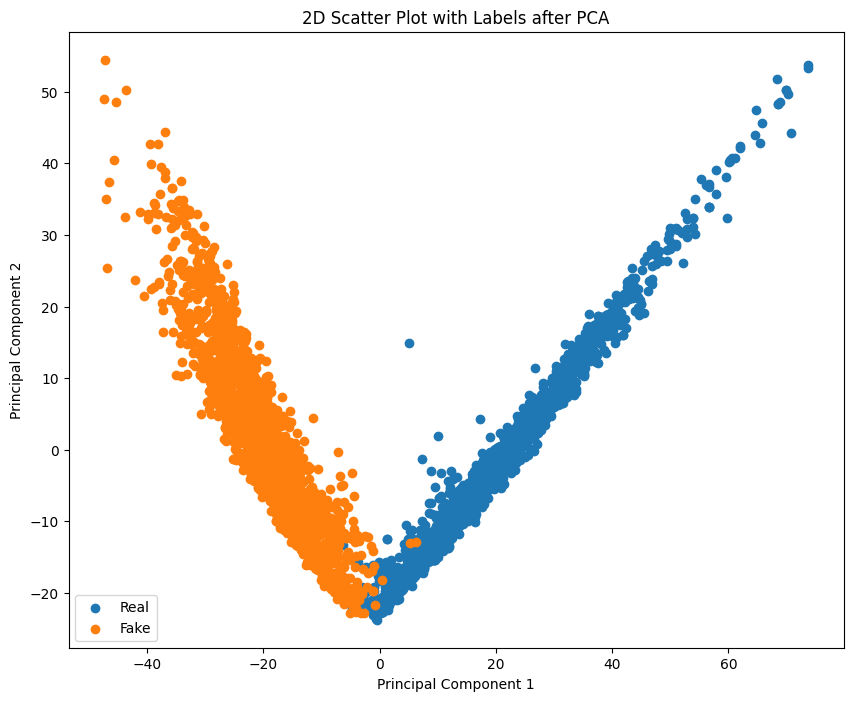

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[df['label'] == 'real', 0], X_scaled[df['label'] == 'real', 1], label='Real')
plt.scatter(X_scaled[df['label'] == 'fake', 0], X_scaled[df['label'] == 'fake', 1],  label='Fake')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot with Labels after PCA')
plt.legend()
plt.show();

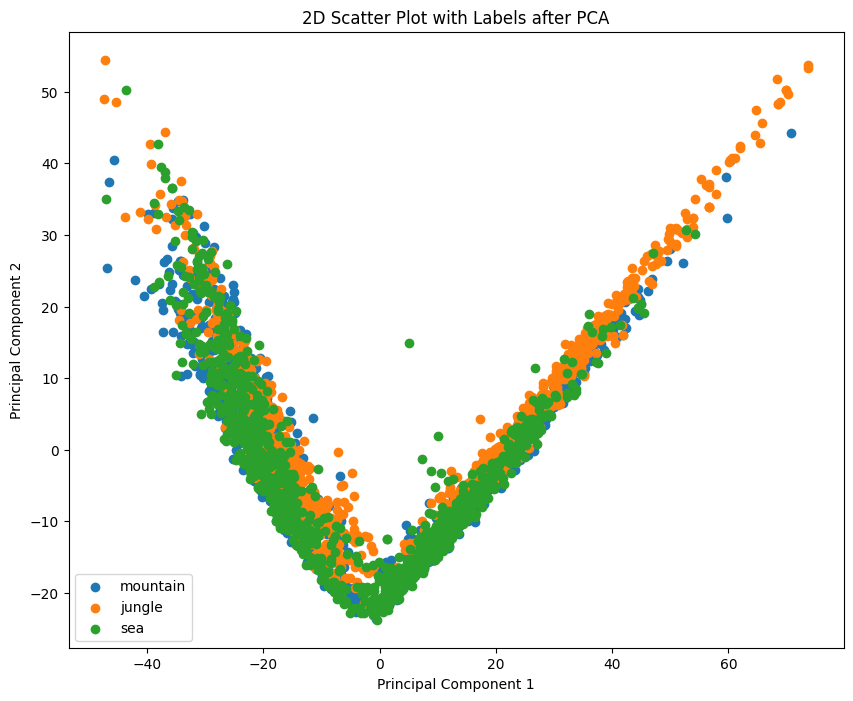

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[df['nature'] == 'mountain', 0], X_scaled[df['nature'] == 'mountain', 1],  label='mountain')
plt.scatter(X_scaled[df['nature'] == 'jungle', 0], X_scaled[df['nature'] == 'jungle', 1], label='jungle')
plt.scatter(X_scaled[df['nature'] == 'sea', 0], X_scaled[df['nature'] == 'sea', 1],  label='sea')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot with Labels after PCA')
plt.legend()
plt.show();

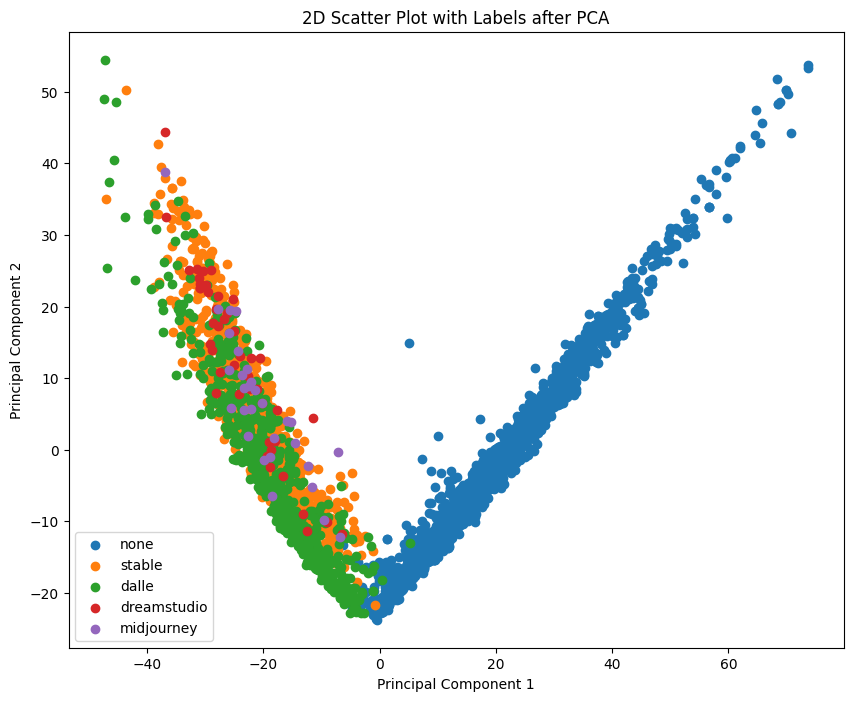

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[df['generator'] == 'none', 0], X_scaled[df['generator']  == 'none', 1],  label='none')
plt.scatter(X_scaled[df['generator'] == 'stable', 0], X_scaled[df['generator']  == 'stable', 1],  label='stable')
plt.scatter(X_scaled[df['generator'] == 'dalle', 0], X_scaled[df['generator']  == 'dalle', 1],  label='dalle')
plt.scatter(X_scaled[df['generator'] == 'dreamstudio', 0], X_scaled[df['generator']  == 'dreamstudio', 1],  label='dreamstudio')
plt.scatter(X_scaled[df['generator'] == 'midjourney', 0], X_scaled[df['generator']  == 'midjourney', 1],  label='midjourney')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot with Labels after PCA')

plt.legend()

plt.show();

## K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Feature 2')

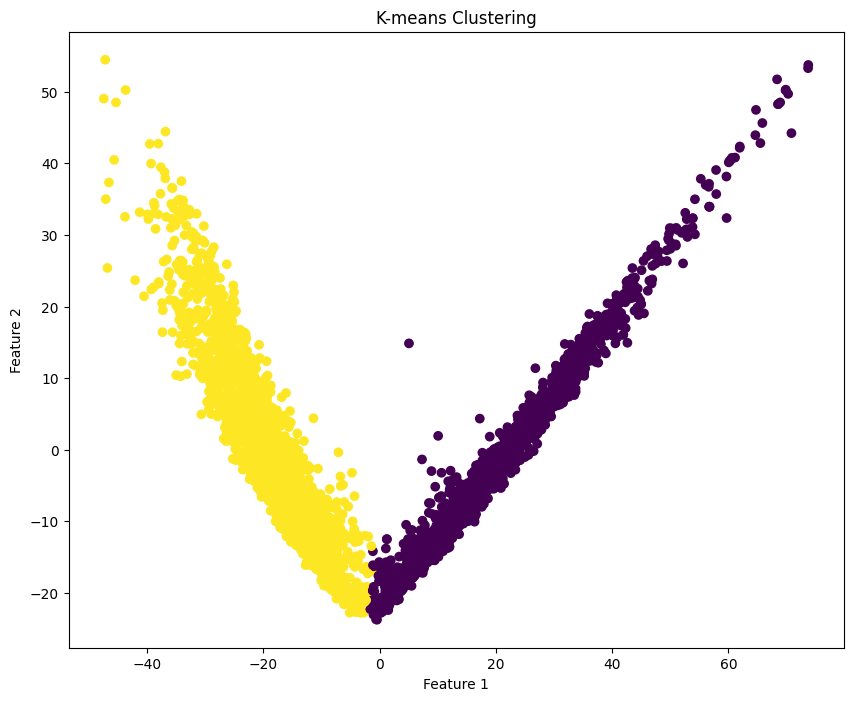

In [ ]:
kmeans2 = KMeans(n_clusters=2, random_state=1)
Kmeans2_pred = kmeans2.fit_predict(X_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Kmeans2_pred, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Feature 2')

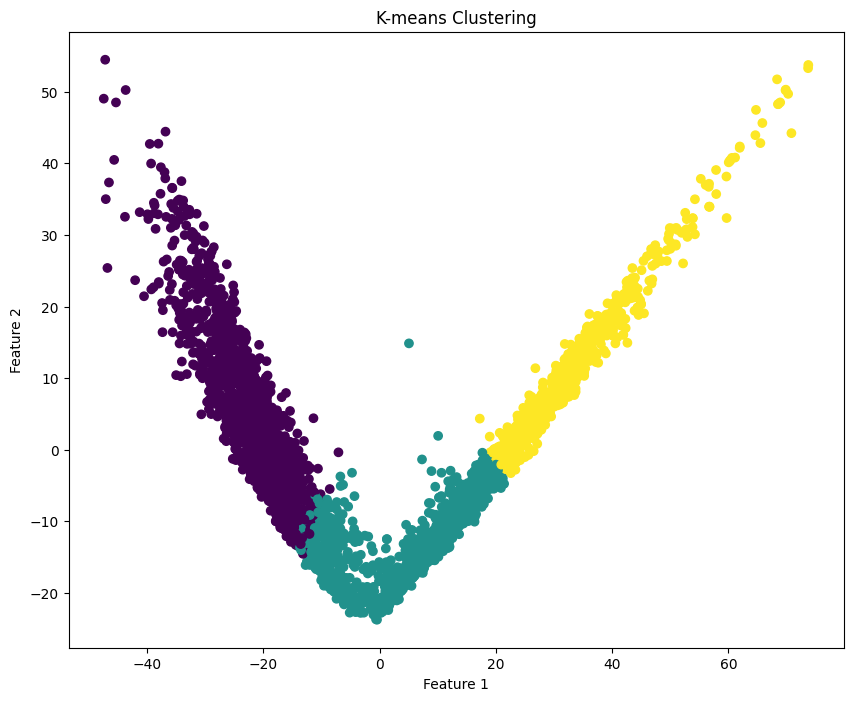

In [ ]:
kmeans3 = KMeans(n_clusters=3, random_state=1)
Kmeans3_pred = kmeans3.fit_predict(X_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Kmeans3_pred, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Feature 2')

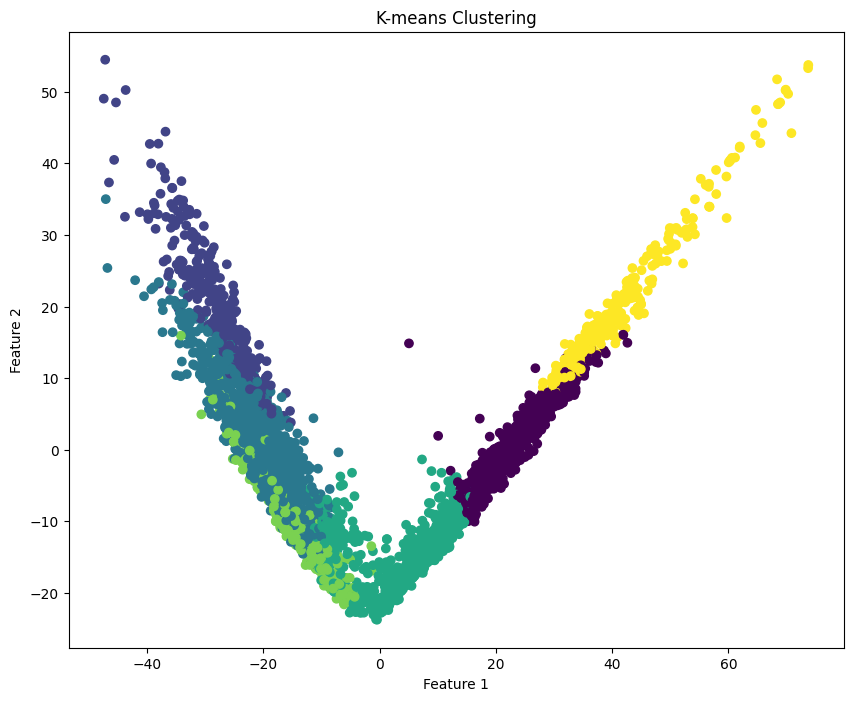

In [ ]:
kmeans6 = KMeans(n_clusters=6, random_state=1)
Kmeans6_pred = kmeans6.fit_predict(X_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Kmeans6_pred, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [ ]:
from matplotlib.image import imread
import os
def show_pictures(pictures):
  fake_images_dir = os.listdir('/content/drive/MyDrive/fake')
  real_images_dir = os.listdir('/content/drive/MyDrive/real')
  images = []
  for i in range(len(pictures)):

    file_name = str(pictures[i])
    if ('fake' in file_name) or ('Fake' in file_name):
      images.append(imread("/content/drive/MyDrive/fake/" + file_name))
    elif ('fake' in file_name) or ('Fake' in file_name):
      images.append(imread("/content/drive/MyDrive/fake/" + file_name))
    elif ('real' in file_name) or ('Real' in file_name):
      images.append(imread("/content/drive/MyDrive/real/" + file_name))
    elif ('real' in file_name) or ('Real' in file_name):
      images.append(imread("/content/drive/MyDrive/real/" + file_name))

  return images

In [ ]:
def get_clustert_images(clustring,num_images_per_cluster = 3):
  cluster_labels = clustring.labels_
  names = []
  num_images_per_cluster = 2
  for cluster in range(clustring.n_clusters):
      cluster_indices = np.where(cluster_labels == cluster)[0]
      selected_indices = np.random.choice(cluster_indices, size=num_images_per_cluster, replace=False)
      for i, idx in enumerate(selected_indices):
          name = names_.iloc[idx].to_string(index=False)
          names.append(name)
  return names

810199515_fake_DALL.E_mountain_4.jpeg


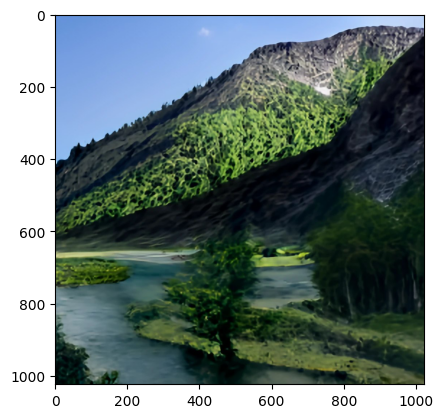

810101114_fake_stable_sea_2.jpeg


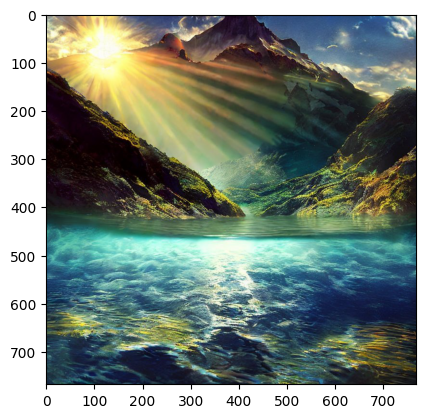

810199515_fake_DALL.E_sea_4.jpeg


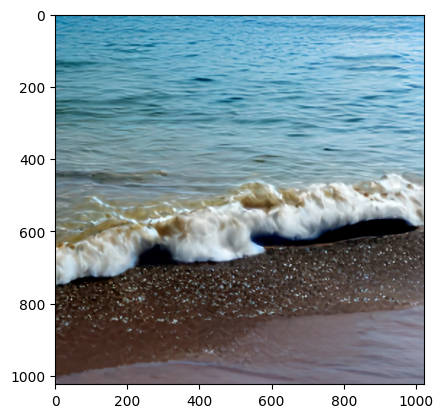

810199436_fake_dalle_mountain_3.jpeg


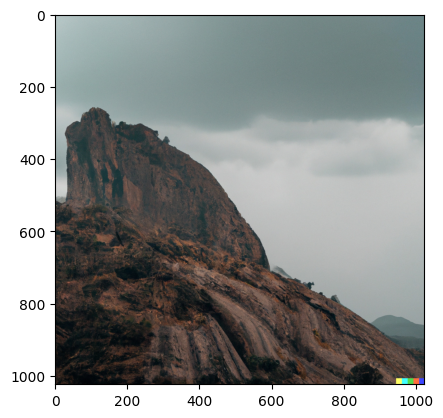

810101066_real_none_sea_5.jpeg


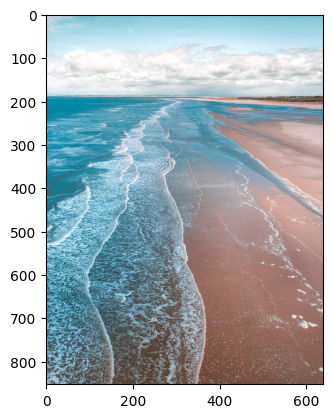

830400052_real_none_jungle_6.jpeg


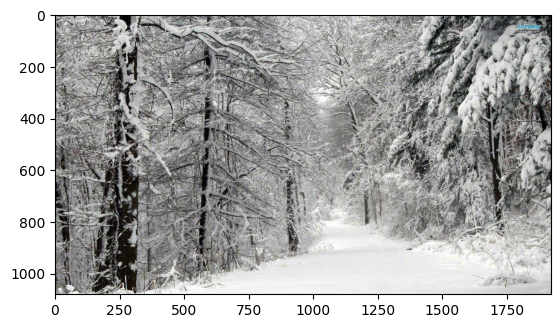

In [ ]:
cluster_file_names = get_clustert_images(kmeans3)
images = show_pictures(cluster_file_names)

for i in range(len(images)):
      print(cluster_file_names[i])
      plt.imshow(images[i])
      plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Feature 2')

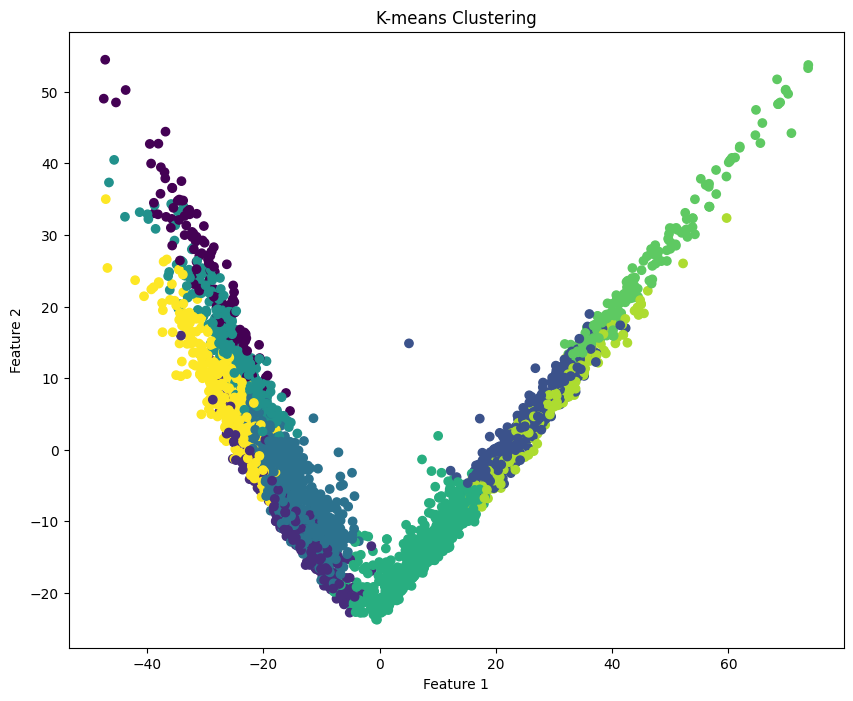

In [ ]:
kmeans9 = KMeans(n_clusters=9, random_state=1)
Kmeans9_pred = kmeans9.fit_predict(X_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Kmeans9_pred, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Feature 2')

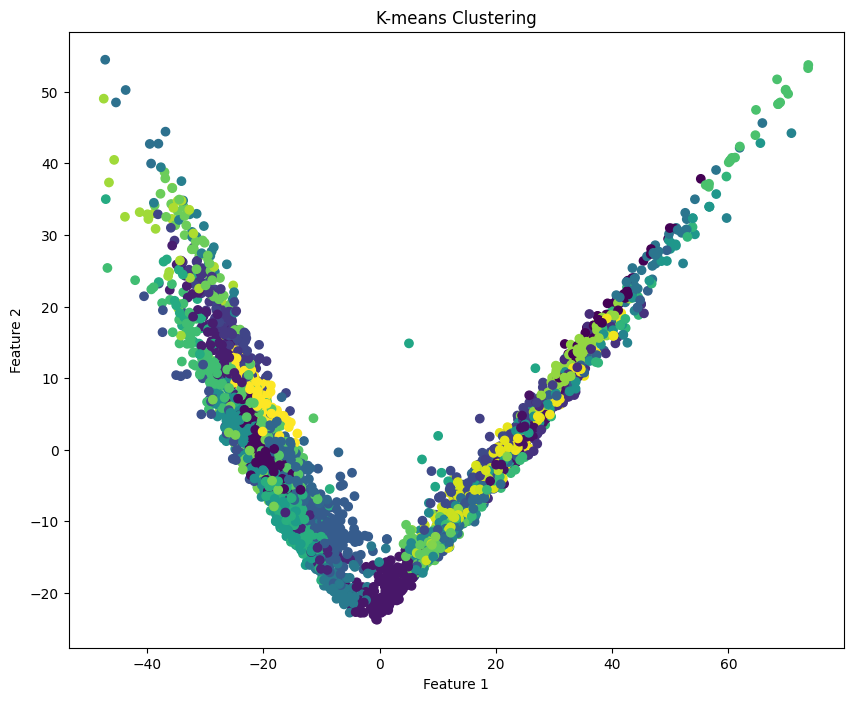

In [ ]:
kmeans50 = KMeans(n_clusters=50, random_state=1)
Kmeans50_pred = kmeans50.fit_predict(X_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Kmeans50_pred, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [ ]:
print("silhouette score of kmeans 2:", metrics.silhouette_score(features,Kmeans2_pred))
print("silhouette score of kmeans 3:", metrics.silhouette_score(features,Kmeans3_pred))
print("silhouette score of kmeans 6:", metrics.silhouette_score(features,Kmeans6_pred))
print("silhouette score of kmeans 9:", metrics.silhouette_score(features,Kmeans9_pred))
print("silhouette score of kmeans 50:", metrics.silhouette_score(features,Kmeans50_pred))

silhouette score of kmeans 2: 0.29566377201628674
silhouette score of kmeans 3: 0.2027549646398918
silhouette score of kmeans 6: 0.19999399574986768
silhouette score of kmeans 9: 0.18710746298519149
silhouette score of kmeans 50: 0.10525905689649541


In [ ]:
print("calinski harabasz score of kmeans 2:", metrics.calinski_harabasz_score(features,Kmeans2_pred))
print("calinski harabasz score of kmeans 3:", metrics.calinski_harabasz_score(features,Kmeans3_pred))
print("calinski harabasz score of kmeans 6:", metrics.calinski_harabasz_score(features,Kmeans6_pred))
print("calinski harabasz score of kmeans 9:", metrics.calinski_harabasz_score(features,Kmeans9_pred))
print("calinski harabasz score of kmeans 50:", metrics.calinski_harabasz_score(features,Kmeans50_pred))

calinski harabasz score of kmeans 2: 1518.9329564523382
calinski harabasz score of kmeans 3: 1147.1080746649504
calinski harabasz score of kmeans 6: 914.9294254367292
calinski harabasz score of kmeans 9: 770.8969424055392
calinski harabasz score of kmeans 50: 301.0384239934688


In [ ]:
print("davies bouldin score of kmeans 2:", metrics.davies_bouldin_score(features,Kmeans2_pred))
print("davies bouldin score of kmeans 3:", metrics.davies_bouldin_score(features,Kmeans3_pred))
print("davies bouldin score of kmeans 6:", metrics.davies_bouldin_score(features,Kmeans6_pred))
print("davies bouldin score of kmeans 9:", metrics.davies_bouldin_score(features,Kmeans9_pred))
print("davies bouldin score of kmeans 50:", metrics.davies_bouldin_score(features,Kmeans50_pred))

davies bouldin score of kmeans 2: 1.3329563241464084
davies bouldin score of kmeans 3: 1.4277307452604024
davies bouldin score of kmeans 6: 1.4869498625344706
davies bouldin score of kmeans 9: 1.5694378482759872
davies bouldin score of kmeans 50: 1.7176709572653435


In [ ]:
print("completeness score of kmeans 2:", metrics.cluster.completeness_score(y_encoded,Kmeans2_pred))

completeness score of kmeans 2: 0.9309649217525287


## GMM

In [ ]:
def gaussian_mixture(features, n_components):
    # Instantiate and fit the Gaussian Mixture Model
    gmm_model = GaussianMixture(n_components=n_components)
    gmm_pred = gmm_model.fit_predict(features)

    # Get unique clusters
    clusters = np.unique(gmm_pred)

    # Create a scatter plot for each cluster
    plt.figure(figsize=(10, 8))
    for cluster in clusters:
        cluster_indices = np.where(gmm_pred == cluster)[0]
        plt.scatter(features[cluster_indices, 0], features[cluster_indices, 1])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Gaussian Mixture Model Clustering (n_components={n_components})')
    plt.show()
    return gmm_pred

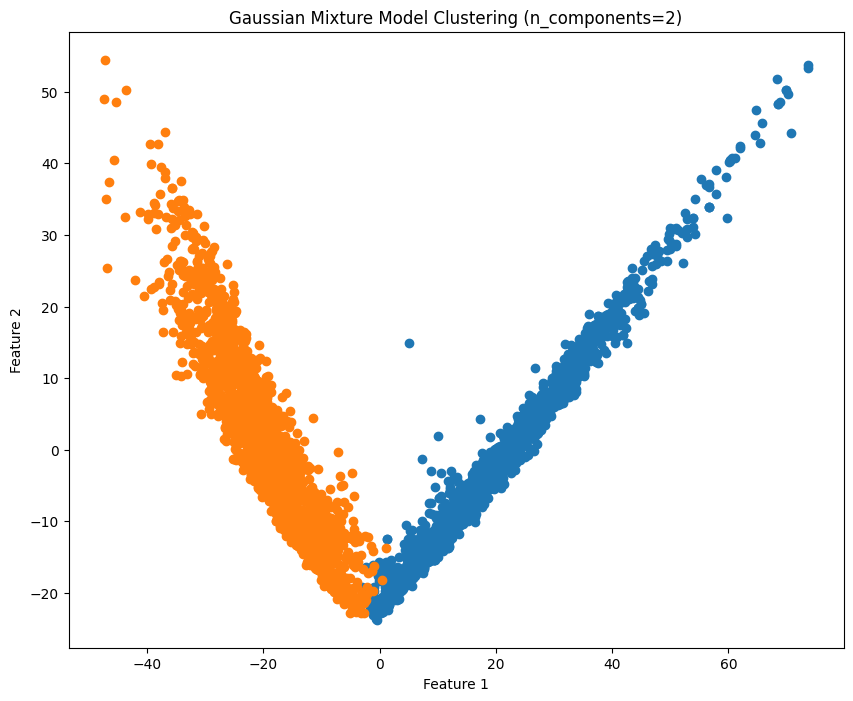

In [ ]:
GMM2_pred = gaussian_mixture(X_scaled, n_components=2)

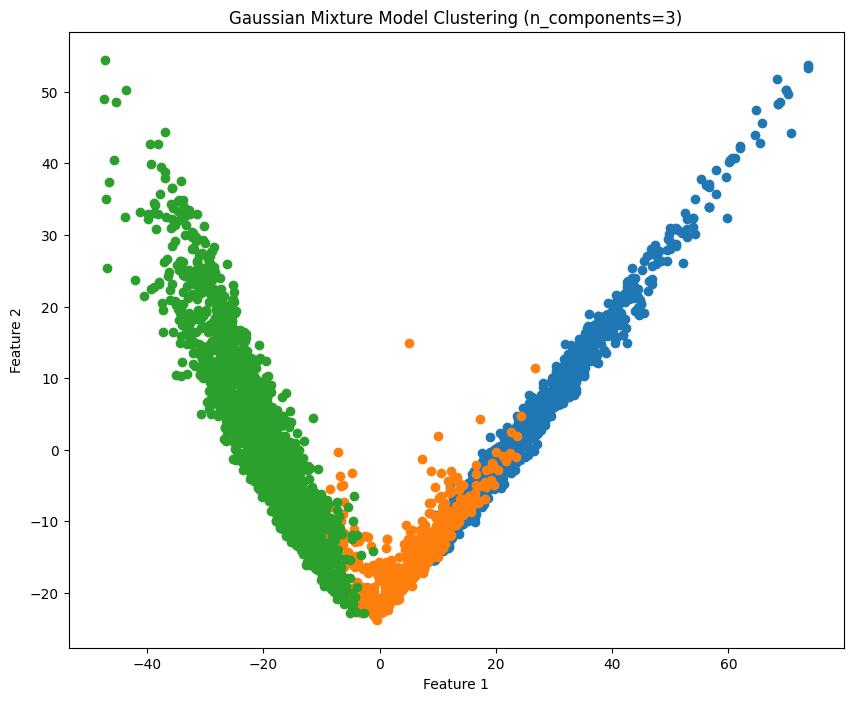

In [ ]:
GMM3_pred = gaussian_mixture(X_scaled, n_components=3)

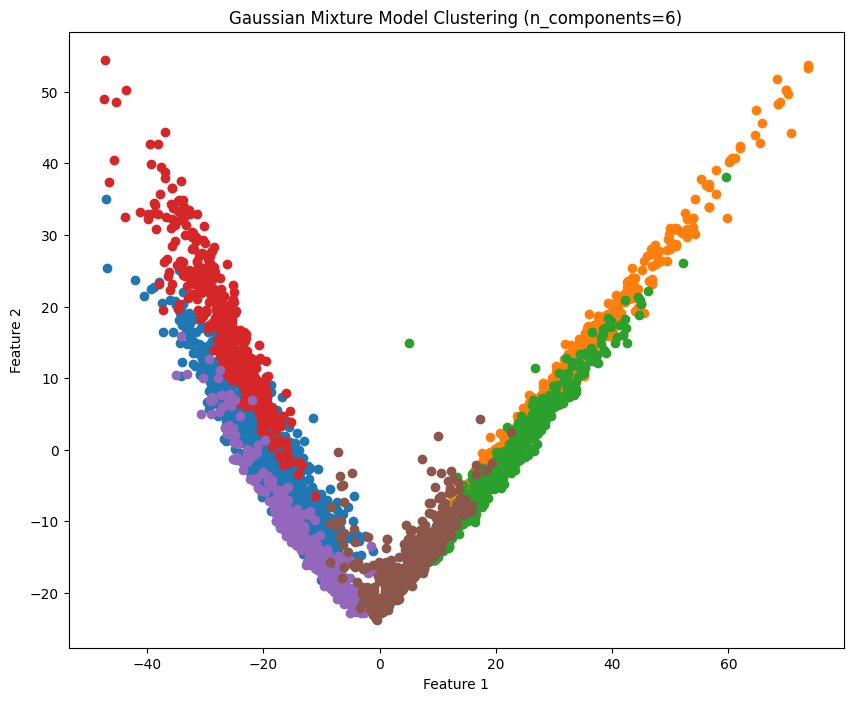

In [ ]:
GMM6_pred = gaussian_mixture(X_scaled, n_components=6)

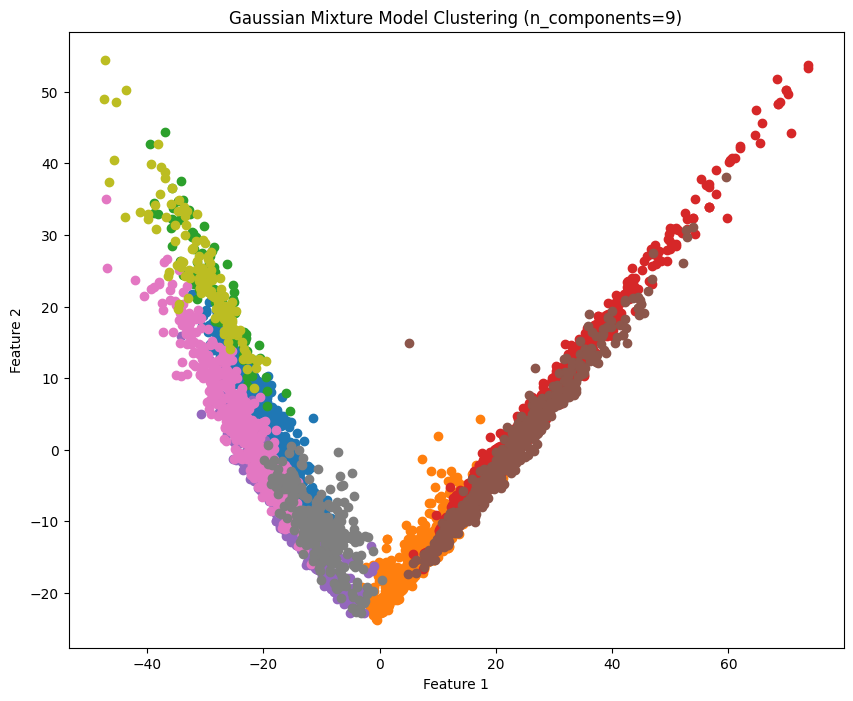

In [ ]:
GMM9_pred = gaussian_mixture(X_scaled, n_components=9)

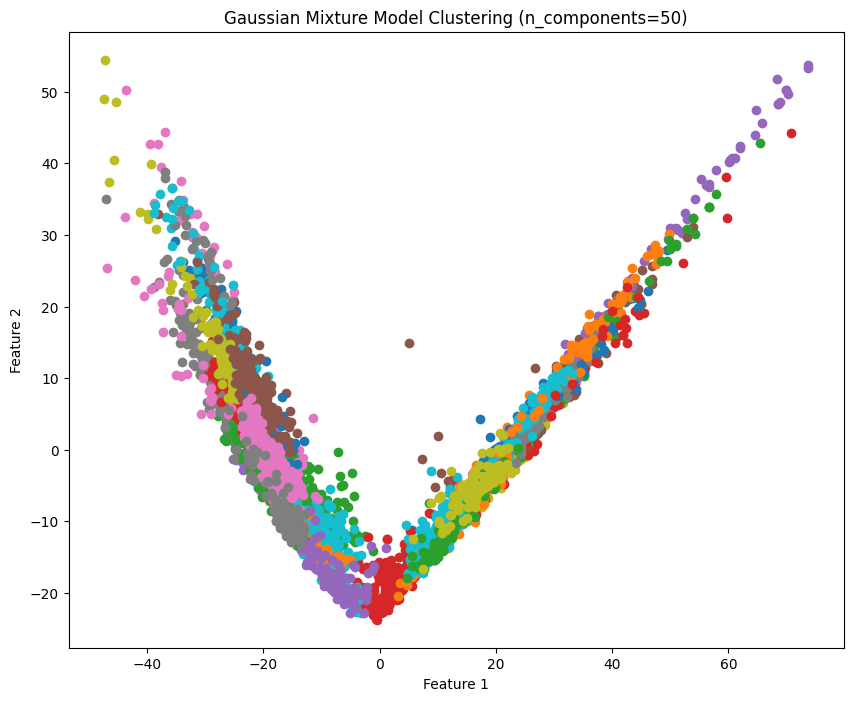

In [ ]:
GMM50_pred = gaussian_mixture(X_scaled, n_components=50)

In [ ]:
print("silhouette score of GMM 2:", metrics.silhouette_score(X_scaled,GMM2_pred))
print("silhouette score of GMM 3:", metrics.silhouette_score(X_scaled,GMM3_pred))
print("silhouette score of GMM 6:", metrics.silhouette_score(X_scaled,GMM6_pred))
print("silhouette score of GMM 9:", metrics.silhouette_score(X_scaled,GMM9_pred))
print("silhouette score of GMM 50:", metrics.silhouette_score(X_scaled,GMM50_pred))

silhouette score of GMM 2: 0.31438720040024176
silhouette score of GMM 3: 0.13403218448979373
silhouette score of GMM 6: 0.1404628647777729
silhouette score of GMM 9: 0.11519254654150742
silhouette score of GMM 50: 0.1335200726780646


In [ ]:
print("calinski harabasz score of GMM 2:", metrics.calinski_harabasz_score(X_scaled,GMM2_pred))
print("calinski harabasz score of GMM 3:", metrics.calinski_harabasz_score(X_scaled,GMM3_pred))
print("calinski harabasz score of GMM 6:", metrics.calinski_harabasz_score(X_scaled,GMM6_pred))
print("calinski harabasz score of GMM 9:", metrics.calinski_harabasz_score(X_scaled,GMM9_pred))
print("calinski harabasz score of GMM 50:", metrics.calinski_harabasz_score(X_scaled,GMM50_pred))

calinski harabasz score of GMM 2: 1709.5215246882628
calinski harabasz score of GMM 3: 1086.182906823212
calinski harabasz score of GMM 6: 762.8750447466383
calinski harabasz score of GMM 9: 618.2180810627556
calinski harabasz score of GMM 50: 302.8724340447883


In [ ]:
print("davies bouldin score of GMM 2:", metrics.davies_bouldin_score(X_scaled,GMM2_pred))
print("davies bouldin score of GMM 3:", metrics.davies_bouldin_score(X_scaled,GMM3_pred))
print("davies bouldin score of GMM 6:", metrics.davies_bouldin_score(X_scaled,GMM6_pred))
print("davies bouldin score of GMM 9:", metrics.davies_bouldin_score(X_scaled,GMM9_pred))
print("davies bouldin score of GMM 50:", metrics.davies_bouldin_score(X_scaled,GMM50_pred))

davies bouldin score of GMM 2: 1.2889959395063604
davies bouldin score of GMM 3: 1.5661543429172695
davies bouldin score of GMM 6: 1.8321596229011299
davies bouldin score of GMM 9: 1.699419762256742
davies bouldin score of GMM 50: 1.6419615904172014


In [ ]:
print("completeness score of GMM 2:", metrics.cluster.completeness_score(y_encoded,GMM2_pred))

completeness score of GMM 2: 0.9491409654789126


## Agglomerative Clustering

In [ ]:
def agglomerative_clustering(features, n_clusters):
    # Instantiate and fit the Agglomerative Clustering model
    agglomerative_model = AgglomerativeClustering(n_clusters=n_clusters)
    agglomerative_pred = agglomerative_model.fit_predict(features)

    # Get unique clusters
    clusters = np.unique(agglomerative_pred)

    # Create a scatter plot for each cluster
    plt.figure(figsize=(10, 8))
    for cluster in clusters:
        cluster_indices = np.where(agglomerative_pred == cluster)[0]
        plt.scatter(features[cluster_indices, 0], features[cluster_indices, 1])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Agglomerative Clustering (n_clusters={n_clusters})')
    plt.show()
    return agglomerative_pred

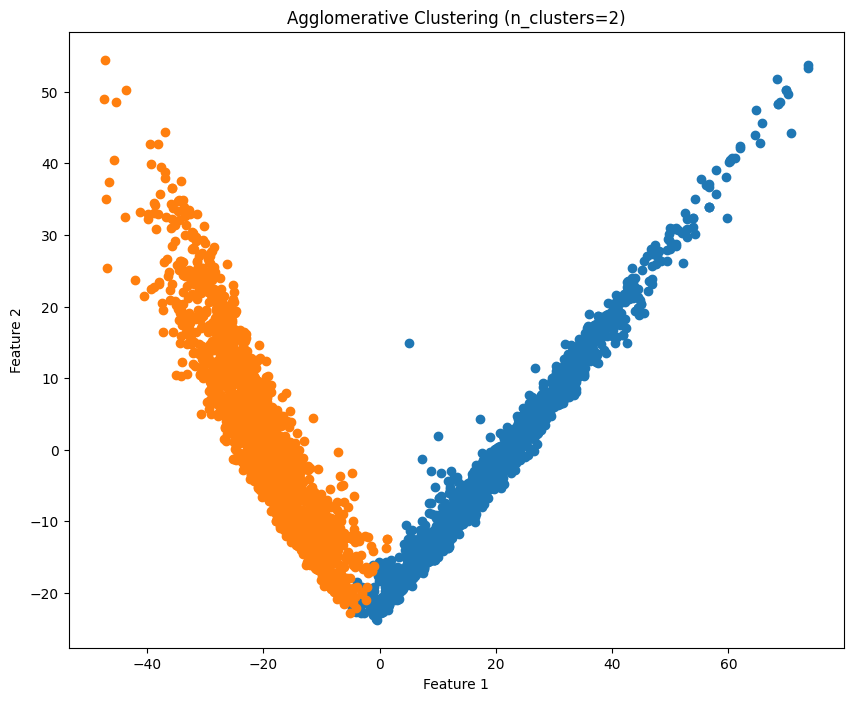

In [ ]:
AGC2_pred = agglomerative_clustering(X_scaled, n_clusters=2)

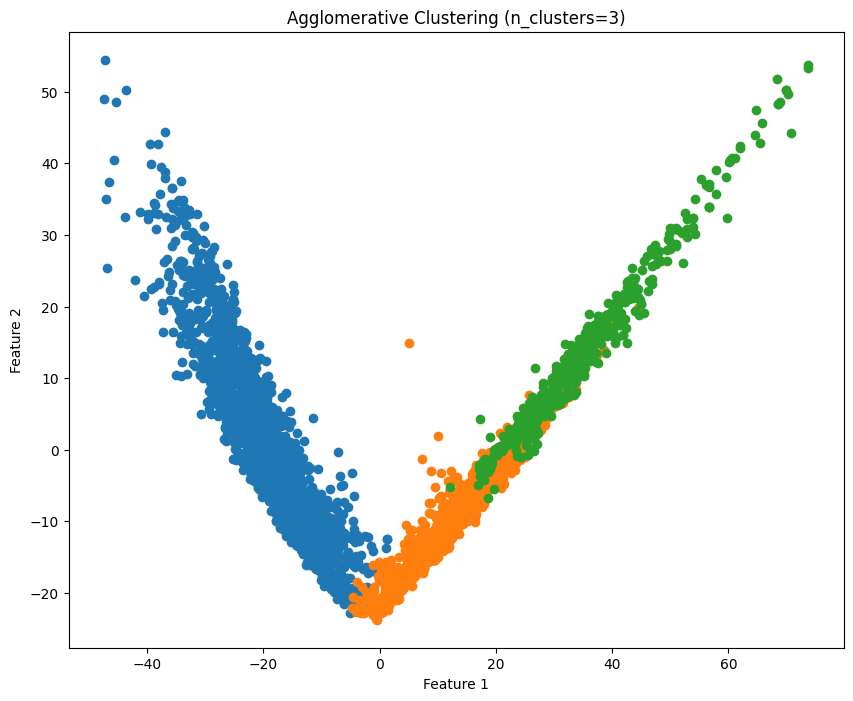

In [ ]:
AGC3_pred = agglomerative_clustering(X_scaled, n_clusters=3)

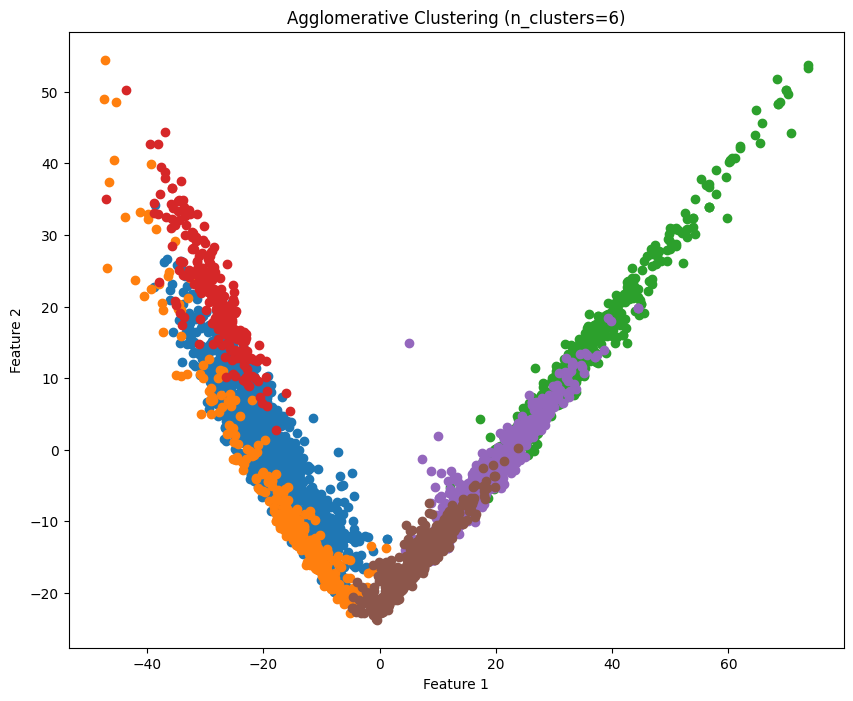

In [ ]:
AGC6_pred = agglomerative_clustering(X_scaled, n_clusters=6)

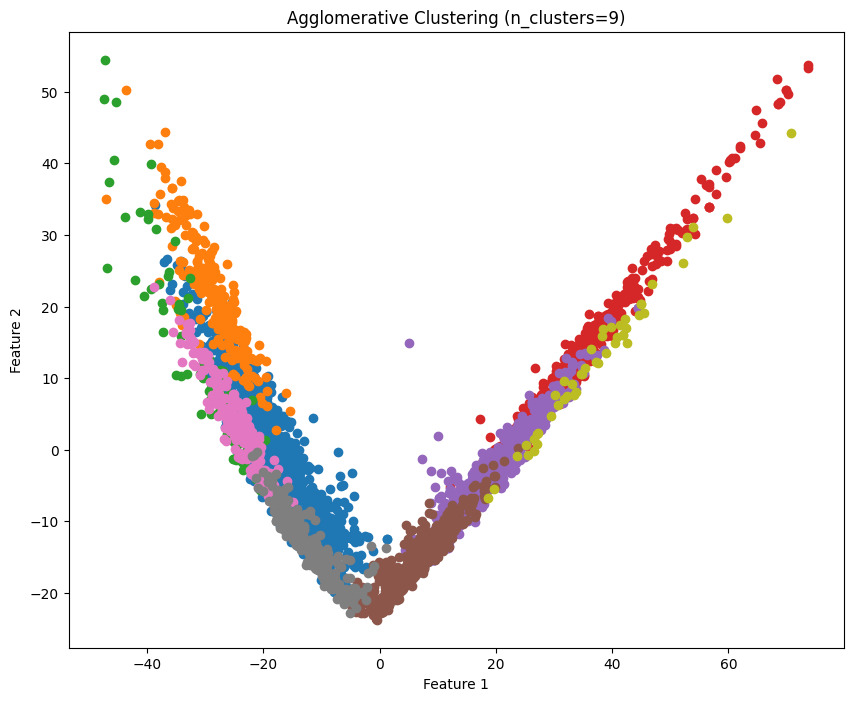

In [ ]:
AGC9_pred = agglomerative_clustering(X_scaled, n_clusters=9)

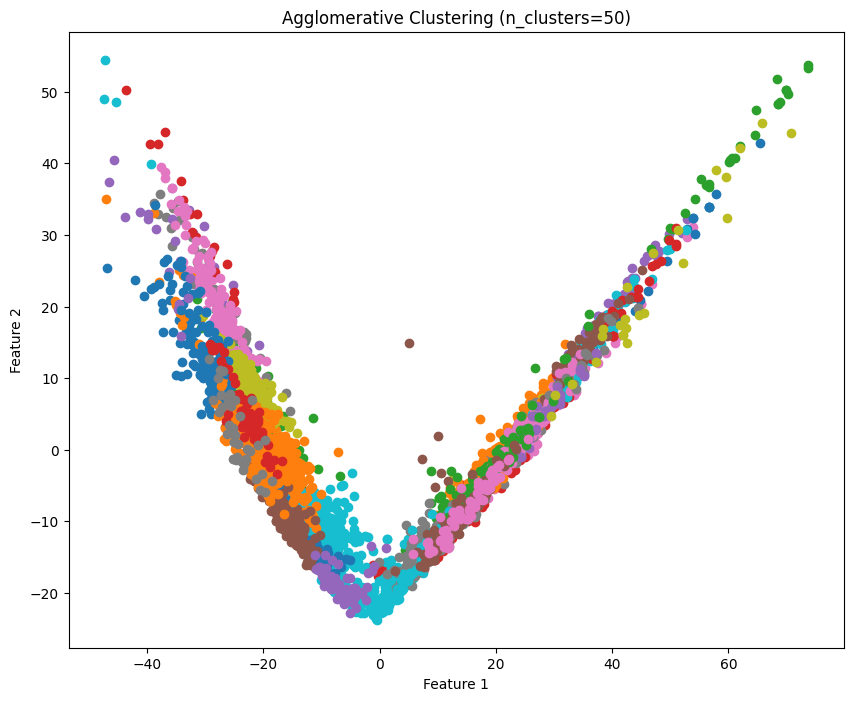

In [ ]:
AGC50_pred = agglomerative_clustering(X_scaled, n_clusters=50)

In [ ]:
print("silhouette score of Agglomerative Clustering 2:", metrics.silhouette_score(X_scaled,AGC2_pred))
print("silhouette score of Agglomerative Clustering 3:", metrics.silhouette_score(X_scaled,AGC3_pred))
print("silhouette score of Agglomerative Clustering 6:", metrics.silhouette_score(X_scaled,AGC6_pred))
print("silhouette score of Agglomerative Clustering 9:", metrics.silhouette_score(X_scaled,AGC9_pred))
print("silhouette score of Agglomerative Clustering 50:", metrics.silhouette_score(X_scaled,AGC50_pred))

silhouette score of Agglomerative Clustering 2: 0.31442776612947126
silhouette score of Agglomerative Clustering 3: 0.25974981675795455
silhouette score of Agglomerative Clustering 6: 0.16112301725046205
silhouette score of Agglomerative Clustering 9: 0.13948881412184108
silhouette score of Agglomerative Clustering 50: 0.1000064875606587


In [ ]:
print("calinski harabasz score of Agglomerative Clustering 2:", metrics.calinski_harabasz_score(X_scaled,AGC2_pred))
print("calinski harabasz score of Agglomerative Clustering 3:", metrics.calinski_harabasz_score(X_scaled,AGC3_pred))
print("calinski harabasz score of Agglomerative Clustering 6:", metrics.calinski_harabasz_score(X_scaled,AGC6_pred))
print("calinski harabasz score of Agglomerative Clustering 9:", metrics.calinski_harabasz_score(X_scaled,AGC9_pred))
print("calinski harabasz score of Agglomerative Clustering 50:", metrics.calinski_harabasz_score(X_scaled,AGC50_pred))

calinski harabasz score of Agglomerative Clustering 2: 1707.3401990383015
calinski harabasz score of Agglomerative Clustering 3: 1247.0717587569961
calinski harabasz score of Agglomerative Clustering 6: 816.4547307089207
calinski harabasz score of Agglomerative Clustering 9: 630.4744406985126
calinski harabasz score of Agglomerative Clustering 50: 276.1820164391462


In [ ]:
print("davies bouldin score of Agglomerative Clustering 2:", metrics.davies_bouldin_score(X_scaled,AGC2_pred))
print("davies bouldin score of Agglomerative Clustering 3:", metrics.davies_bouldin_score(X_scaled,AGC3_pred))
print("davies bouldin score of Agglomerative Clustering 6:", metrics.davies_bouldin_score(X_scaled,AGC6_pred))
print("davies bouldin score of Agglomerative Clustering 9:", metrics.davies_bouldin_score(X_scaled,AGC9_pred))
print("davies bouldin score of Agglomerative Clustering 50:", metrics.davies_bouldin_score(X_scaled,AGC50_pred))

davies bouldin score of Agglomerative Clustering 2: 1.2891493958025864
davies bouldin score of Agglomerative Clustering 3: 1.4505657292156233
davies bouldin score of Agglomerative Clustering 6: 1.6877834109388479
davies bouldin score of Agglomerative Clustering 9: 1.5751390627793127
davies bouldin score of Agglomerative Clustering 50: 1.6823229751967639


In [ ]:
print("completeness score of Agglomerative Clustering 2:", metrics.cluster.completeness_score(y_encoded,AGC2_pred))

completeness score of Agglomerative Clustering 2: 0.9311791317281539


## LDA

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=1)  # Specify the number of desired components
X_lda = lda.fit_transform(X_scaled, y_encoded)

kmeans2_lda = KMeans(n_clusters=2, random_state=1)
Kmeans2_pred_lda = kmeans2_lda.fit_predict(X_lda)

gmm_model = GaussianMixture(n_components=2)
GMM2_pred_lda = gmm_model.fit_predict(X_lda)

agglomerative_model = AgglomerativeClustering(n_clusters=2)
AGC2_pred_lda = agglomerative_model.fit_predict(X_lda)

print("completeness score of kmeans 2 with LDA:", metrics.cluster.completeness_score(y_encoded,Kmeans2_pred_lda))
print("completeness score of GMM 2 with LDA:", metrics.cluster.completeness_score(y_encoded,GMM2_pred_lda))
print("completeness score of Agglomerative Clustering 2 with LDA:", metrics.cluster.completeness_score(y_encoded,AGC2_pred_lda))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


completeness score of kmeans 2 with LDA: 0.9401024096393856
completeness score of GMM 2 with LDA: 0.9422283223940137
completeness score of Agglomerative Clustering 2 with LDA: 0.9359353910731034


In [ ]:
arr_new = np.where(y_encoded == 0, 1, 0)

In [ ]:
df['nature'].unique()

array(['mountain', 'jungle', 'sea', None, 'forest', 'see', 'sea5.jpeg',
       'junlge'], dtype=object)

# Extracted Features

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

real_photos_path = '/content/drive/MyDrive/real'
fake_photos_path = '/content/drive/MyDrive/fake'

import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import glob
from PIL import Image

from sklearn.metrics import classification_report
from sklearn import svm

def read_images(folder_path):
    images = []
    files = '*.*'
    image_files = glob.glob(folder_path + '/' + files)
    for file in image_files:
        try:
            image = Image.open(file)
        except:
            continue
        images.append(file)
    return images

real_images = read_images(real_photos_path)
fake_images = read_images(fake_photos_path)
del real_images[1686]

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

real_photos_path = '/content/drive/MyDrive/real'
fake_photos_path = '/content/drive/MyDrive/fake'

import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import glob
from PIL import Image

from sklearn.metrics import classification_report
from sklearn import svm

def read_images(folder_path):
    images = []
    files = '*.*'
    image_files = glob.glob(folder_path + '/' + files)
    for file in image_files:
        try:
            image = Image.open(file)
        except:
            continue
        images.append(file)
    return images

real_images = read_images(real_photos_path)
fake_images = read_images(fake_photos_path)
del real_images[1686]

label_real = []
generator_real = []
nature_real = []
for i in range(len(real_images)):
    if '_' in real_images[i]:
        label_real.append(real_images[i].split('_')[1])
        generator_real.append(real_images[i].split('_')[2])
        nature_real.append(real_images[i].split('_')[3])
    elif '-' in real_images[i]:
        label_real.append(real_images[i].split('-')[1])
        generator_real.append(real_images[i].split('-')[2])
        nature_real.append(real_images[i].split('-')[3])

label_fake = []
generator_fake = []
nature_fake = []
for i in range(len(fake_images)):
    if '_' in fake_images[i]:
        label_fake.append(fake_images[i].split('_')[1])
        generator_fake.append(fake_images[i].split('_')[2])
        nature_fake.append(fake_images[i].split('_')[3])
    elif '-' in fake_images[i]:
        label_fake.append(fake_images[i].split('-')[1])
        generator_fake.append(fake_images[i].split('-')[2])
        nature_fake.append(fake_images[i].split('-')[3])

d = {'label':label_real, 'generator':generator_real ,'nature':nature_real}
df_real = pd.DataFrame(data=d)
df_real

d = {'label':label_fake, 'generator':generator_fake ,'nature':nature_fake}
df_fake = pd.DataFrame(data=d)
df_fake

df = pd.concat([df_real,df_fake])
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


label generator    nature
0     real      none    jungle
1     real      none    jungle
2     real      none    jungle
3     real      none    jungle
4     real      none    jungle
...    ...       ...       ...
1705  fake    stable       sea
1706  fake    stable       sea
1707  fake    stable       sea
1708  fake    stable  mountain
1709  fake    stable  mountain

[3417 rows x 3 columns]

In [ ]:
df[(df['nature'] == 'junlge') & (df['nature'] == 'forest')] = 'jungle'
df[(df['nature'] == 'see') & (df['nature'] == 'sea5.jpeg')] = 'sea'
df.columns = df.columns.astype(str)

In [ ]:
!gdown 17fgqPrDkOw_L9eZSDReqeuUMYeK9EdYv
data = np.load('All_Features.npz')
data = data['data']
X = data[:, :-1]
y = data[:, -1]

Downloading...
From: https://drive.google.com/uc?id=17fgqPrDkOw_L9eZSDReqeuUMYeK9EdYv
To: /content/All_Features.npz
100% 1.37G/1.37G [00:12<00:00, 108MB/s]


In [ ]:
preprocessor = StandardScaler()
X_scaled = preprocessor.fit_transform(X)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

Dimonsion Reduction

In [ ]:
pca = PCA(n_components=0.95)
X_scaled = pca.fit_transform(X_scaled)
# lda = LinearDiscriminantAnalysis(n_components=1)  # Specify the number of desired components
# X_scaled = lda.fit_transform(X_scaled, y_encoded)

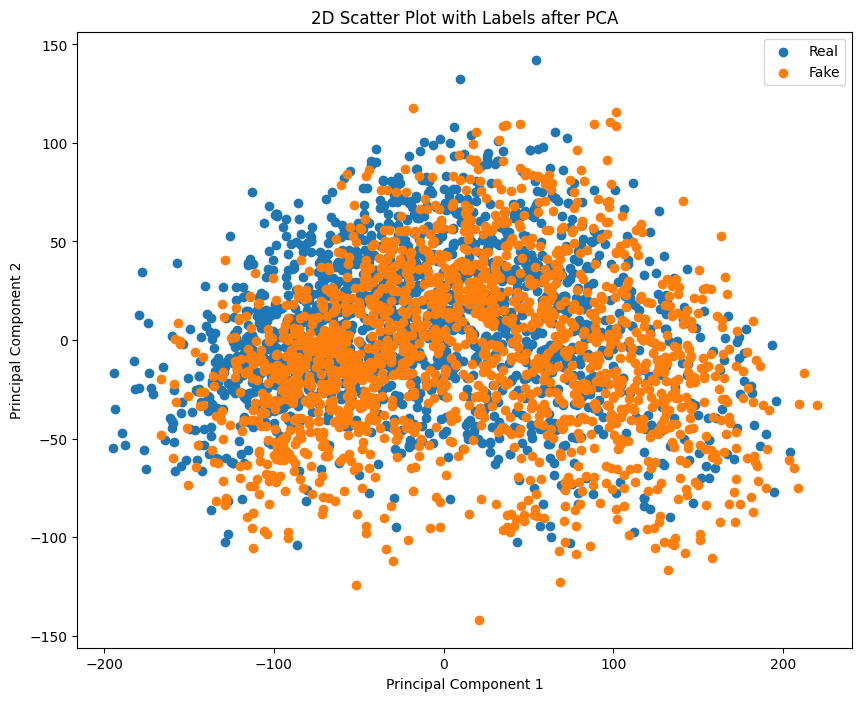

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[df['label'] == 'real', 0], X_scaled[df['label'] == 'real', 1], label='Real')
plt.scatter(X_scaled[df['label'] == 'fake', 0], X_scaled[df['label'] == 'fake', 1],  label='Fake')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot with Labels after PCA')
plt.legend()
plt.show();

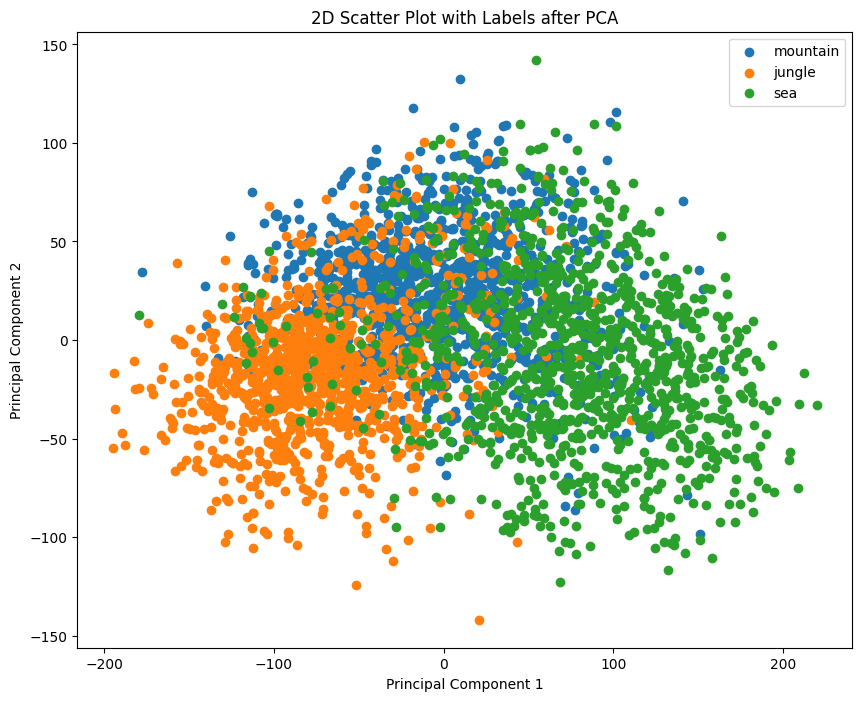

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[df['nature'] == 'mountain', 0], X_scaled[df['nature'] == 'mountain', 1],  label='mountain')
plt.scatter(X_scaled[df['nature'] == 'jungle', 0], X_scaled[df['nature'] == 'jungle', 1], label='jungle')
plt.scatter(X_scaled[df['nature'] == 'sea', 0], X_scaled[df['nature'] == 'sea', 1],  label='sea')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot with Labels after PCA')
plt.legend()
plt.show();

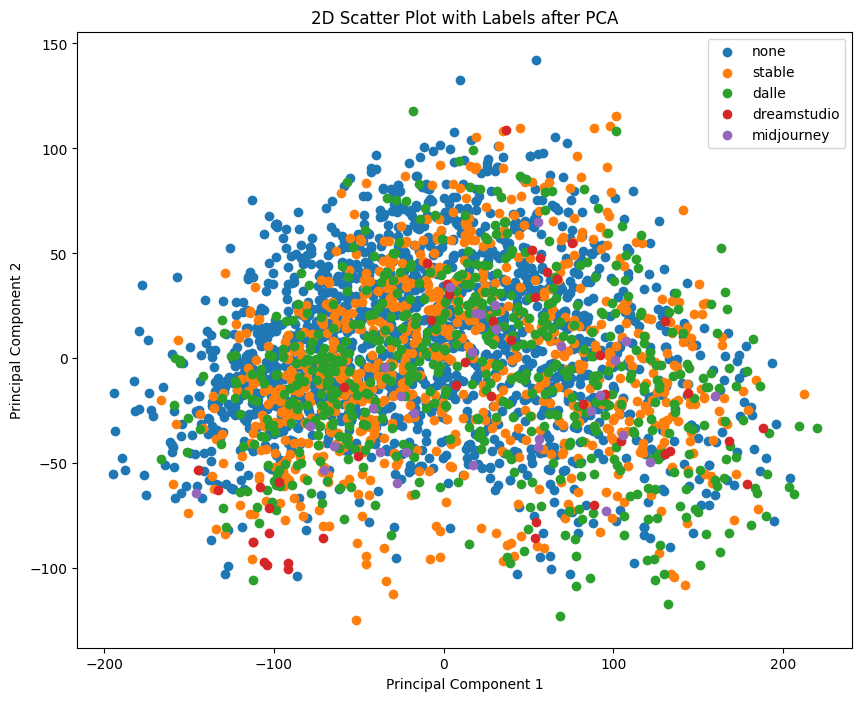

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[df['generator'] == 'none', 0], X_scaled[df['generator']  == 'none', 1],  label='none')
plt.scatter(X_scaled[df['generator'] == 'stable', 0], X_scaled[df['generator']  == 'stable', 1],  label='stable')
plt.scatter(X_scaled[df['generator'] == 'dalle', 0], X_scaled[df['generator']  == 'dalle', 1],  label='dalle')
plt.scatter(X_scaled[df['generator'] == 'dreamstudio', 0], X_scaled[df['generator']  == 'dreamstudio', 1],  label='dreamstudio')
plt.scatter(X_scaled[df['generator'] == 'midjourney', 0], X_scaled[df['generator']  == 'midjourney', 1],  label='midjourney')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot with Labels after PCA')
plt.legend()
plt.show();

## K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Feature 2')

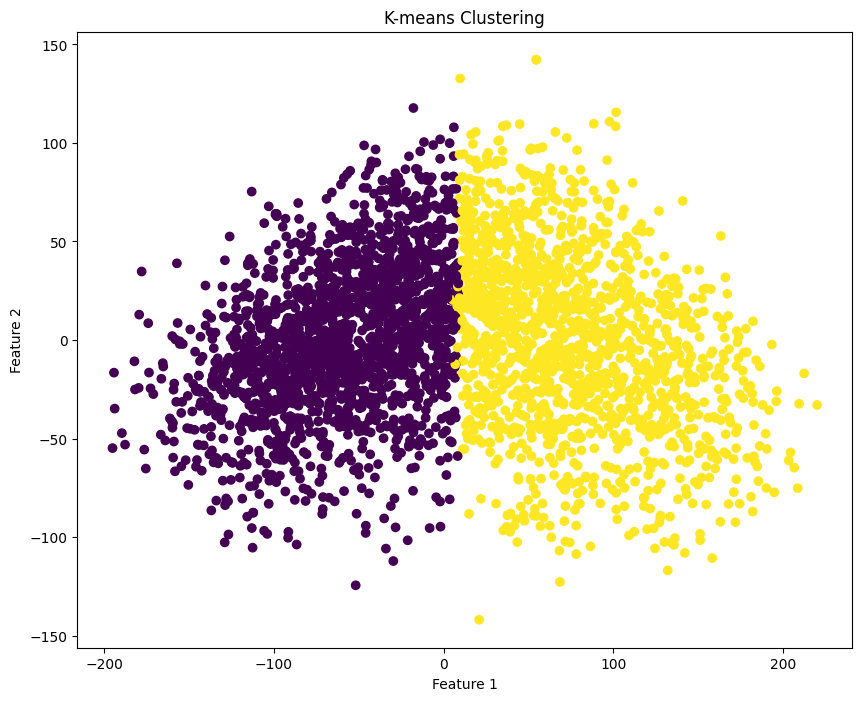

In [ ]:
kmeans2 = KMeans(n_clusters=2, random_state=1)
Kmeans2_pred = kmeans2.fit_predict(X_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Kmeans2_pred, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Feature 2')

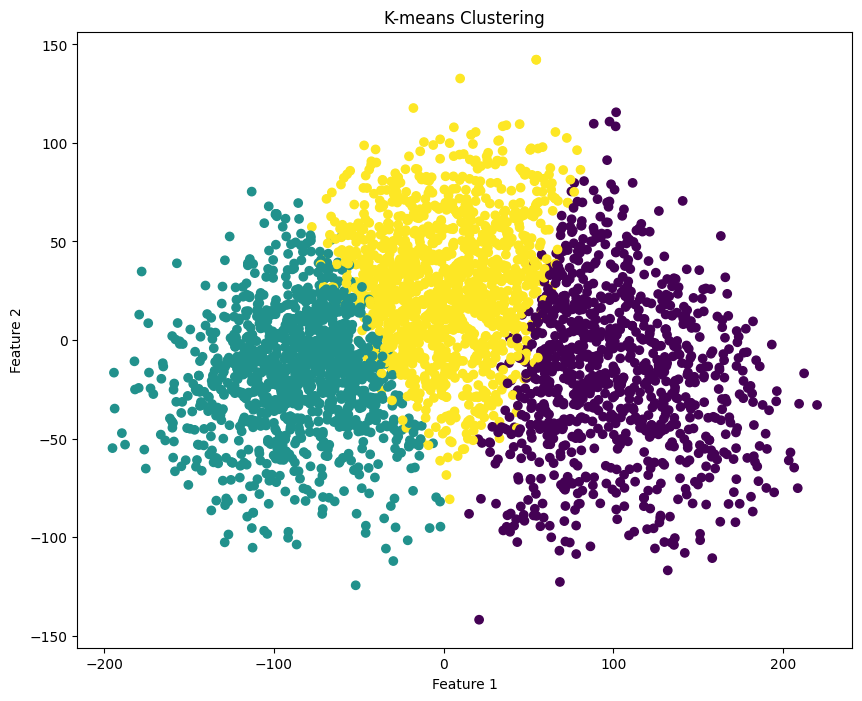

In [ ]:
kmeans3 = KMeans(n_clusters=3, random_state=1)
Kmeans3_pred = kmeans3.fit_predict(X_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Kmeans3_pred, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Feature 2')

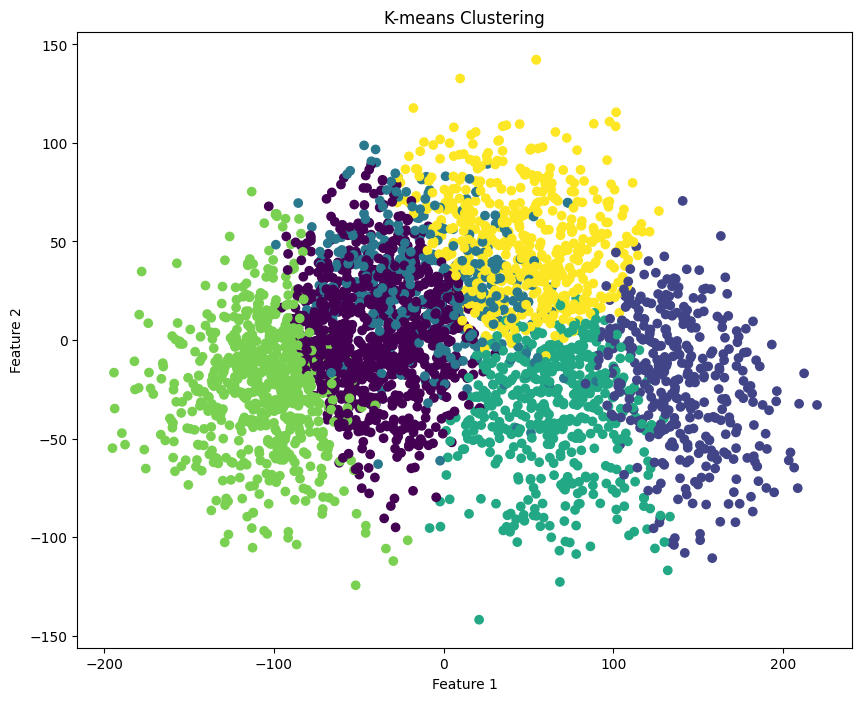

In [ ]:
kmeans6 = KMeans(n_clusters=6, random_state=1)
Kmeans6_pred = kmeans6.fit_predict(X_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Kmeans6_pred, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [ ]:
from matplotlib.image import imread
import os
def show_pictures(pictures):
  fake_images_dir = os.listdir('/content/drive/MyDrive/fake')
  real_images_dir = os.listdir('/content/drive/MyDrive/real')
  images = []
  for i in range(len(pictures)):

    file_name = str(pictures[i])
    if ('fake' in file_name) or ('Fake' in file_name):
      images.append(imread("/content/drive/MyDrive/fake/" + file_name))
    elif ('fake' in file_name) or ('Fake' in file_name):
      images.append(imread("/content/drive/MyDrive/fake/" + file_name))
    elif ('real' in file_name) or ('Real' in file_name):
      images.append(imread("/content/drive/MyDrive/real/" + file_name))
    elif ('real' in file_name) or ('Real' in file_name):
      images.append(imread("/content/drive/MyDrive/real/" + file_name))

  return images

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Feature 2')

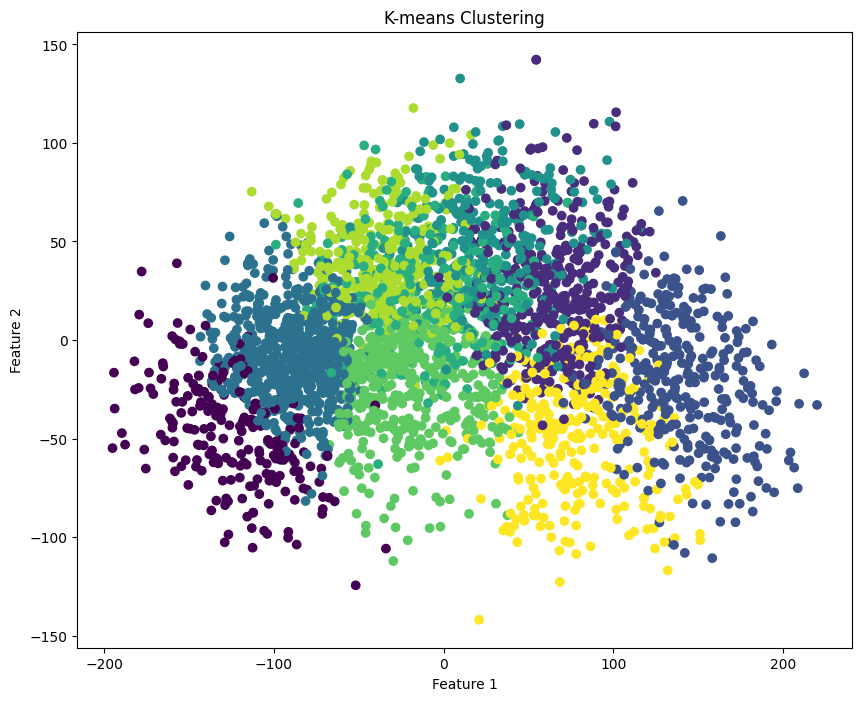

In [ ]:
kmeans9 = KMeans(n_clusters=9, random_state=1)
Kmeans9_pred = kmeans9.fit_predict(X_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Kmeans9_pred, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Feature 2')

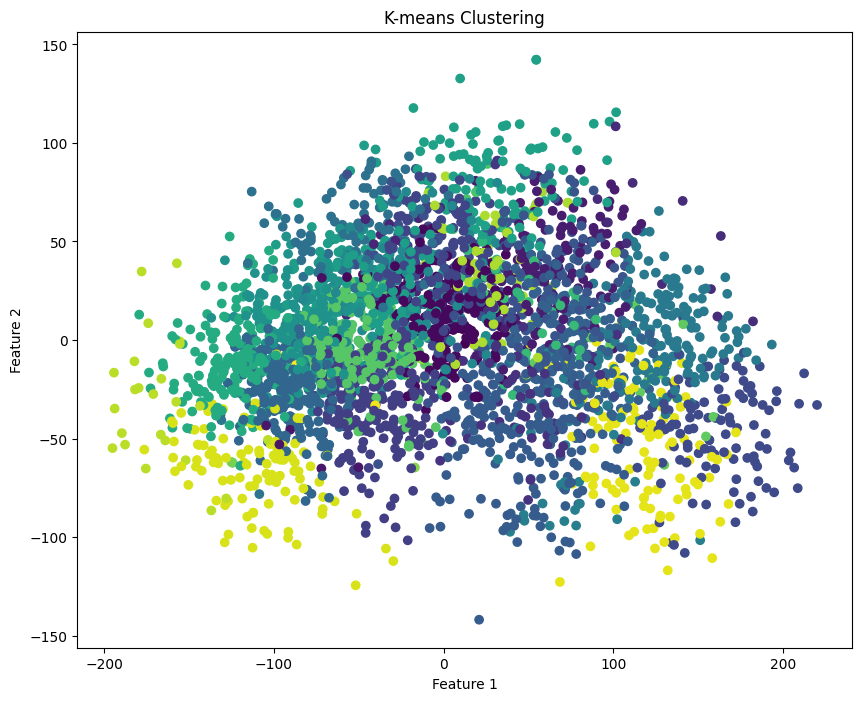

In [ ]:
kmeans50 = KMeans(n_clusters=50, random_state=1)
Kmeans50_pred = kmeans50.fit_predict(X_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Kmeans50_pred, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [ ]:
print("silhouette score of kmeans 2:", metrics.silhouette_score(X_scaled,Kmeans2_pred))
print("silhouette score of kmeans 3:", metrics.silhouette_score(X_scaled,Kmeans3_pred))
print("silhouette score of kmeans 6:", metrics.silhouette_score(X_scaled,Kmeans6_pred))
print("silhouette score of kmeans 9:", metrics.silhouette_score(X_scaled,Kmeans9_pred))
print("silhouette score of kmeans 50:", metrics.silhouette_score(X_scaled,Kmeans50_pred))

silhouette score of kmeans 2: 0.07042481311942882
silhouette score of kmeans 3: 0.04538637463332119
silhouette score of kmeans 6: 0.01884129953622537
silhouette score of kmeans 9: 0.011905005865078663
silhouette score of kmeans 50: -0.012272498115940843


In [ ]:
print("calinski harabasz score of kmeans 2:", metrics.calinski_harabasz_score(X,Kmeans2_pred))
print("calinski harabasz score of kmeans 3:", metrics.calinski_harabasz_score(X,Kmeans3_pred))
print("calinski harabasz score of kmeans 6:", metrics.calinski_harabasz_score(X,Kmeans6_pred))
print("calinski harabasz score of kmeans 9:", metrics.calinski_harabasz_score(X,Kmeans9_pred))
print("calinski harabasz score of kmeans 50:", metrics.calinski_harabasz_score(X,Kmeans50_pred))

calinski harabasz score of kmeans 2: 513.5832888055461
calinski harabasz score of kmeans 3: 453.0732929835153
calinski harabasz score of kmeans 6: 170.85031987883744
calinski harabasz score of kmeans 9: 117.52927184417923
calinski harabasz score of kmeans 50: 23.604242481617003


In [ ]:
print("davies bouldin score of kmeans 2:", metrics.davies_bouldin_score(X,Kmeans2_pred))
print("davies bouldin score of kmeans 3:", metrics.davies_bouldin_score(X,Kmeans3_pred))
print("davies bouldin score of kmeans 6:", metrics.davies_bouldin_score(X,Kmeans6_pred))
print("davies bouldin score of kmeans 9:", metrics.davies_bouldin_score(X,Kmeans9_pred))
print("davies bouldin score of kmeans 50:", metrics.davies_bouldin_score(X,Kmeans50_pred))

davies bouldin score of kmeans 2: 2.3382774286632406
davies bouldin score of kmeans 3: 3.6675235896875282
davies bouldin score of kmeans 6: 10.324948275608337
davies bouldin score of kmeans 9: 10.878925332926618
davies bouldin score of kmeans 50: 8.603173626383844


In [ ]:
print("completeness score of kmeans 2:", metrics.cluster.completeness_score(y_encoded,Kmeans2_pred))

completeness score of kmeans 2: 0.00883009300749917


## GMM

In [ ]:
def gaussian_mixture(features, n_components):
    # Instantiate and fit the Gaussian Mixture Model
    gmm_model = GaussianMixture(n_components=n_components)
    gmm_pred = gmm_model.fit_predict(features)

    # Get unique clusters
    clusters = np.unique(gmm_pred)

    # Create a scatter plot for each cluster
    plt.figure(figsize=(10, 8))
    for cluster in clusters:
        cluster_indices = np.where(gmm_pred == cluster)[0]
        plt.scatter(features[cluster_indices, 0], features[cluster_indices, 1])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Gaussian Mixture Model Clustering (n_components={n_components})')
    plt.show()
    return gmm_pred

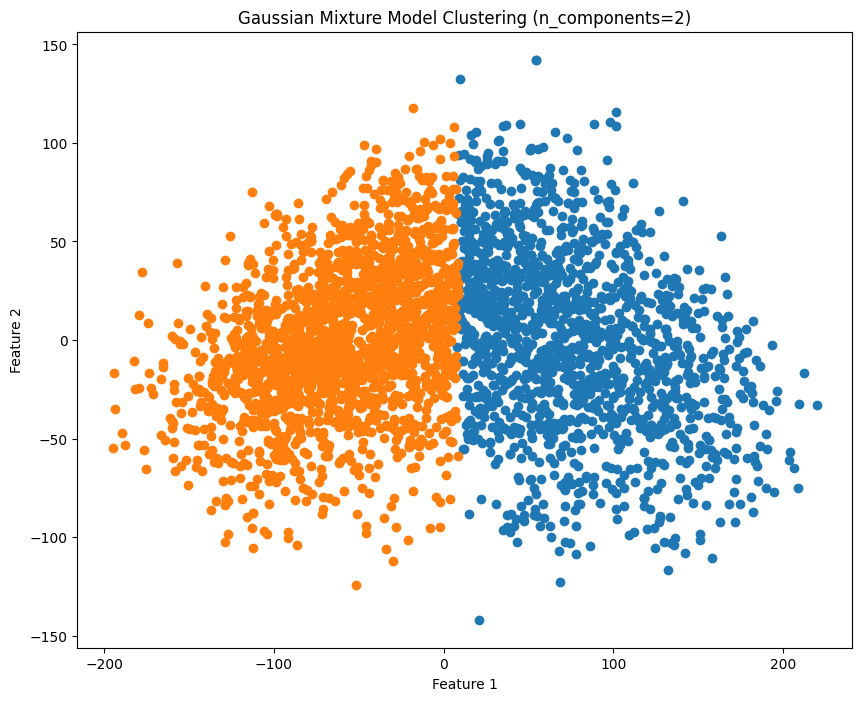

In [ ]:
GMM2_pred = gaussian_mixture(X_scaled, n_components=2)

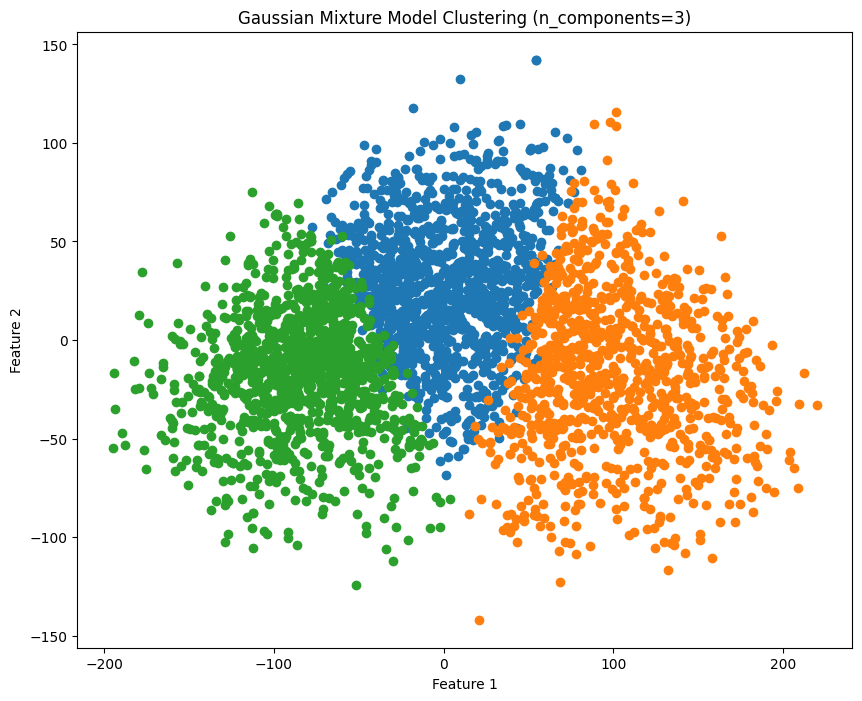

In [ ]:
GMM3_pred = gaussian_mixture(X_scaled, n_components=3)

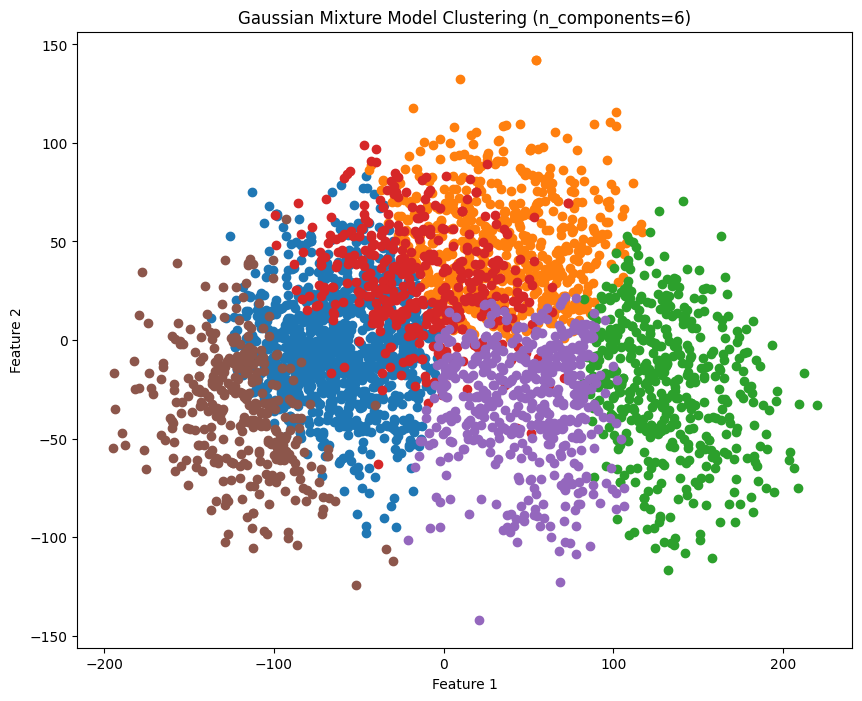

In [ ]:
GMM6_pred = gaussian_mixture(X_scaled, n_components=6)

In [ ]:
GMM9_pred = gaussian_mixture(X_scaled, n_components=9)

In [ ]:
# GMM50_pred = gaussian_mixture(X_scaled, n_components=50)

In [ ]:
print("silhouette score of GMM 2:", metrics.silhouette_score(X_scaled,GMM2_pred))
print("silhouette score of GMM 3:", metrics.silhouette_score(X_scaled,GMM3_pred))
print("silhouette score of GMM 6:", metrics.silhouette_score(X_scaled,GMM6_pred))
print("silhouette score of GMM 9:", metrics.silhouette_score(X_scaled,GMM9_pred))
# print("silhouette score of GMM 50:", metrics.silhouette_score(X_scaled,GMM50_pred))

silhouette score of GMM 2: 0.07042481311942882
silhouette score of GMM 3: 0.045782231699289175
silhouette score of GMM 6: 0.02182072504342641
silhouette score of GMM 9: 0.01468438002249293


In [ ]:
print("calinski harabasz score of GMM 2:", metrics.calinski_harabasz_score(X_scaled,GMM2_pred))
print("calinski harabasz score of GMM 3:", metrics.calinski_harabasz_score(X_scaled,GMM3_pred))
print("calinski harabasz score of GMM 6:", metrics.calinski_harabasz_score(X_scaled,GMM6_pred))
print("calinski harabasz score of GMM 9:", metrics.calinski_harabasz_score(X_scaled,GMM9_pred))
# print("calinski harabasz score of GMM 50:", metrics.calinski_harabasz_score(X_scaled,GMM50_pred))

calinski harabasz score of GMM 2: 267.4556763992277
calinski harabasz score of GMM 3: 177.74805515623552
calinski harabasz score of GMM 6: 91.90369348083856
calinski harabasz score of GMM 9: 60.741735448068205


In [ ]:
print("davies bouldin score of GMM 2:", metrics.davies_bouldin_score(X_scaled,GMM2_pred))
print("davies bouldin score of GMM 3:", metrics.davies_bouldin_score(X_scaled,GMM3_pred))
print("davies bouldin score of GMM 6:", metrics.davies_bouldin_score(X_scaled,GMM6_pred))
print("davies bouldin score of GMM 9:", metrics.davies_bouldin_score(X_scaled,GMM9_pred))
# print("davies bouldin score of GMM 50:", metrics.davies_bouldin_score(X_scaled,GMM50_pred))

davies bouldin score of GMM 2: 3.5245858713963645
davies bouldin score of GMM 3: 4.619731618533322
davies bouldin score of GMM 6: 5.204335228253588
davies bouldin score of GMM 9: 4.7066474989211455


In [ ]:
print("completeness score of GMM 2:", metrics.cluster.completeness_score(y_encoded,GMM2_pred))

completeness score of GMM 2: 0.00883009300749917


## Agglomerative Clustering

In [ ]:
def agglomerative_clustering(features, n_clusters):
    # Instantiate and fit the Agglomerative Clustering model
    agglomerative_model = AgglomerativeClustering(n_clusters=n_clusters)
    agglomerative_pred = agglomerative_model.fit_predict(features)

    # Get unique clusters
    clusters = np.unique(agglomerative_pred)

    # Create a scatter plot for each cluster
    plt.figure(figsize=(10, 8))
    for cluster in clusters:
        cluster_indices = np.where(agglomerative_pred == cluster)[0]
        plt.scatter(features[cluster_indices, 0], features[cluster_indices, 1])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Agglomerative Clustering (n_clusters={n_clusters})')
    plt.show()
    return agglomerative_pred

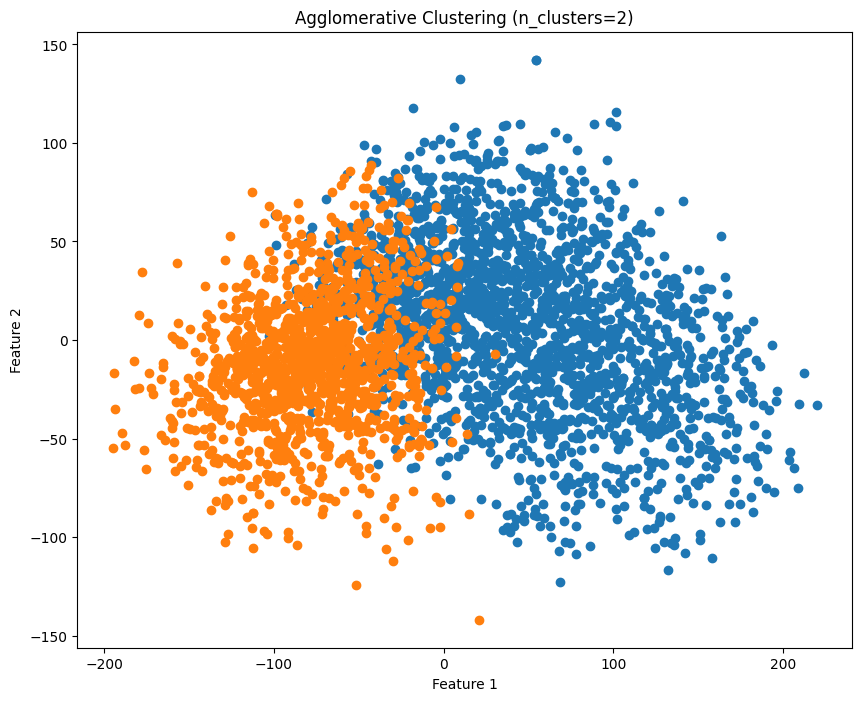

In [ ]:
AGC2_pred = agglomerative_clustering(X_scaled, n_clusters=2)

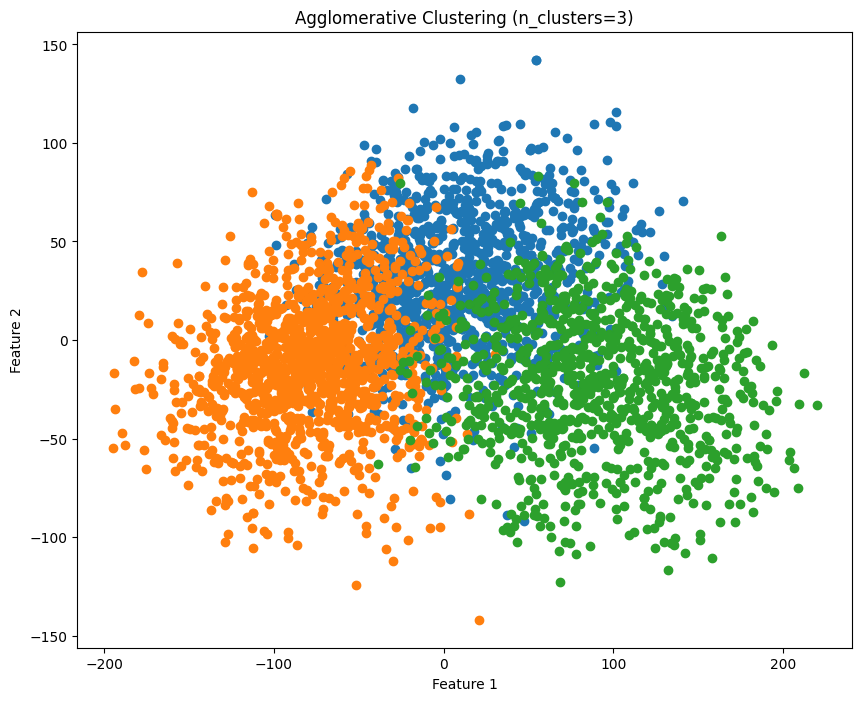

In [ ]:
AGC3_pred = agglomerative_clustering(X_scaled, n_clusters=3)

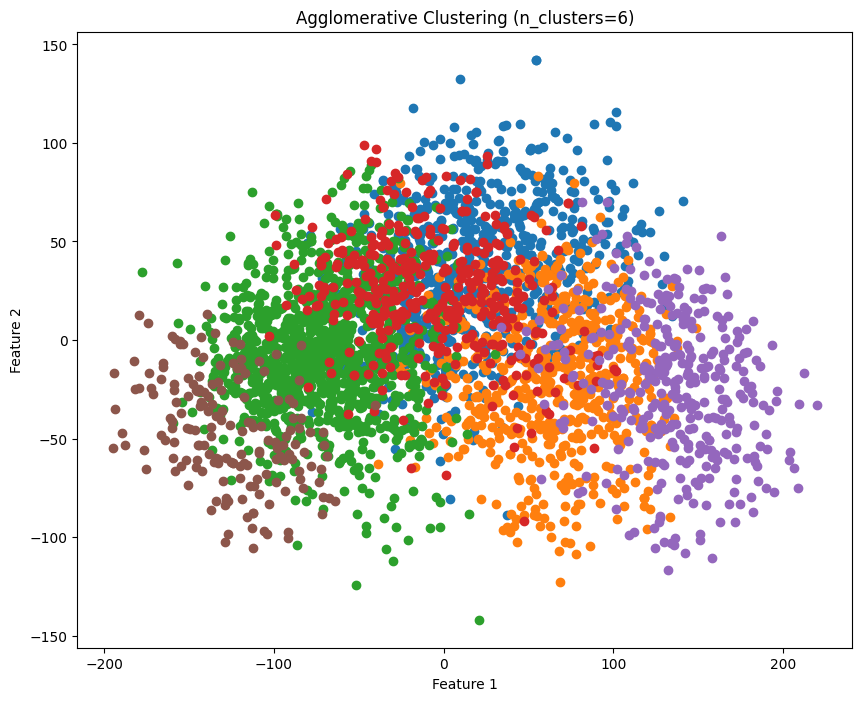

In [ ]:
AGC6_pred = agglomerative_clustering(X_scaled, n_clusters=6)

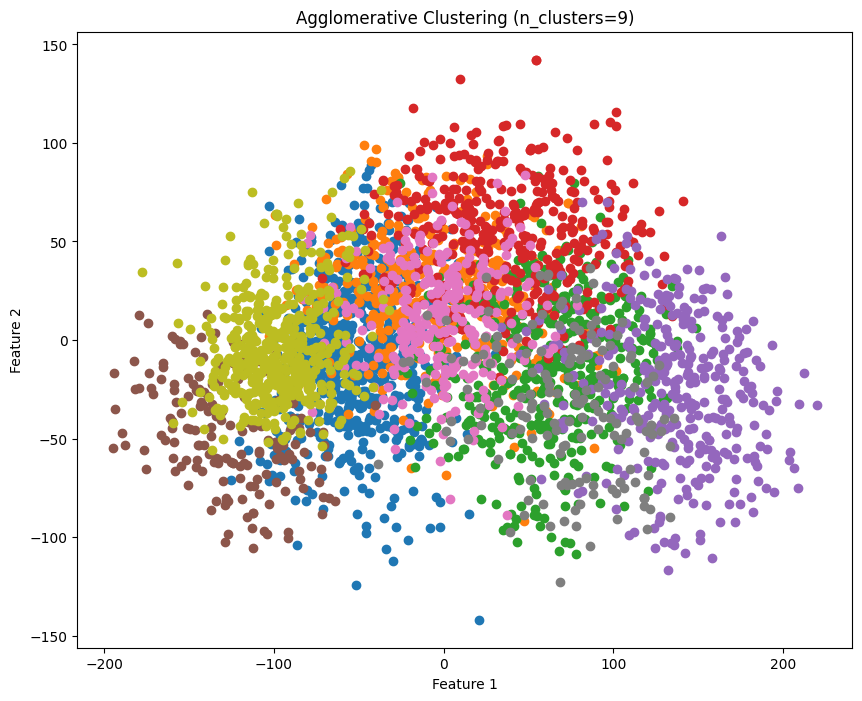

In [ ]:
AGC9_pred = agglomerative_clustering(X_scaled, n_clusters=9)

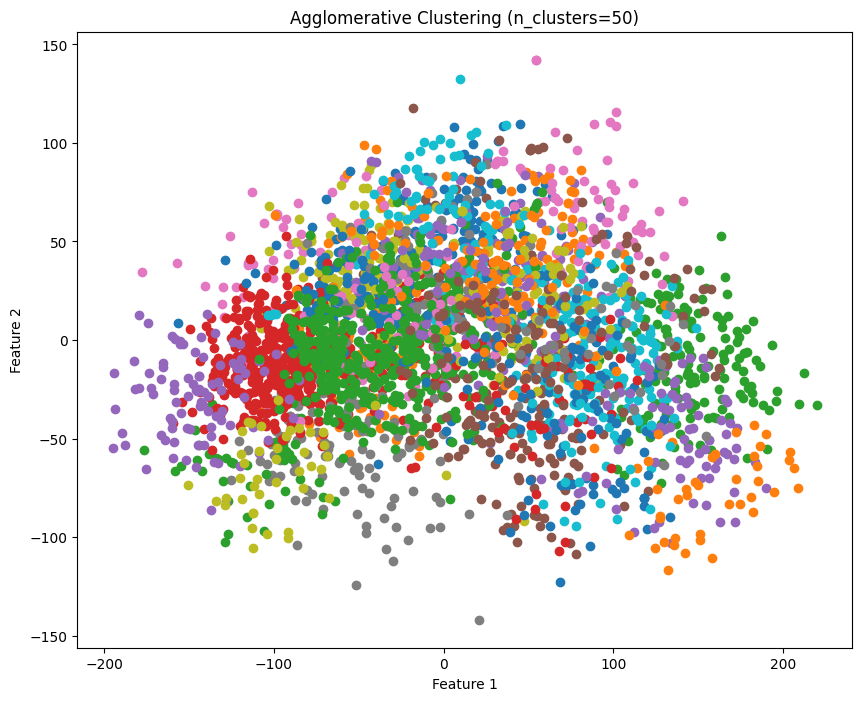

In [ ]:
AGC50_pred = agglomerative_clustering(X_scaled, n_clusters=50)

In [ ]:
print("silhouette score of Agglomerative Clustering 2:", metrics.silhouette_score(X_scaled,AGC2_pred))
print("silhouette score of Agglomerative Clustering 3:", metrics.silhouette_score(X_scaled,AGC3_pred))
print("silhouette score of Agglomerative Clustering 6:", metrics.silhouette_score(X_scaled,AGC6_pred))
print("silhouette score of Agglomerative Clustering 9:", metrics.silhouette_score(X_scaled,AGC9_pred))
print("silhouette score of Agglomerative Clustering 50:", metrics.silhouette_score(X_scaled,AGC50_pred))

silhouette score of Agglomerative Clustering 2: 0.057266320159521315
silhouette score of Agglomerative Clustering 3: 0.04351930311482735
silhouette score of Agglomerative Clustering 6: 0.014957884667081794
silhouette score of Agglomerative Clustering 9: 0.006305824367076678
silhouette score of Agglomerative Clustering 50: -0.03663962854611775


In [ ]:
print("calinski harabasz score of Agglomerative Clustering 2:", metrics.calinski_harabasz_score(X_scaled,AGC2_pred))
print("calinski harabasz score of Agglomerative Clustering 3:", metrics.calinski_harabasz_score(X_scaled,AGC3_pred))
print("calinski harabasz score of Agglomerative Clustering 6:", metrics.calinski_harabasz_score(X_scaled,AGC6_pred))
print("calinski harabasz score of Agglomerative Clustering 9:", metrics.calinski_harabasz_score(X_scaled,AGC9_pred))
print("calinski harabasz score of Agglomerative Clustering 50:", metrics.calinski_harabasz_score(X_scaled,AGC50_pred))

calinski harabasz score of Agglomerative Clustering 2: 224.72224490491587
calinski harabasz score of Agglomerative Clustering 3: 159.64778665102327
calinski harabasz score of Agglomerative Clustering 6: 83.07866984819532
calinski harabasz score of Agglomerative Clustering 9: 58.21652209520111
calinski harabasz score of Agglomerative Clustering 50: 14.267423808294216


In [ ]:
print("davies bouldin score of Agglomerative Clustering 2:", metrics.davies_bouldin_score(X_scaled,AGC2_pred))
print("davies bouldin score of Agglomerative Clustering 3:", metrics.davies_bouldin_score(X_scaled,AGC3_pred))
print("davies bouldin score of Agglomerative Clustering 6:", metrics.davies_bouldin_score(X_scaled,AGC6_pred))
print("davies bouldin score of Agglomerative Clustering 9:", metrics.davies_bouldin_score(X_scaled,AGC9_pred))
print("davies bouldin score of Agglomerative Clustering 50:", metrics.davies_bouldin_score(X_scaled,AGC50_pred))

davies bouldin score of Agglomerative Clustering 2: 3.7420338688357595
davies bouldin score of Agglomerative Clustering 3: 4.817428906352494
davies bouldin score of Agglomerative Clustering 6: 5.435187663162488
davies bouldin score of Agglomerative Clustering 9: 6.487440969336882
davies bouldin score of Agglomerative Clustering 50: 5.050216058049229


In [ ]:
print("completeness score of Agglomerative Clustering 2:", metrics.cluster.completeness_score(y_encoded,AGC2_pred))

completeness score of Agglomerative Clustering 2: 0.0017039146613771732


## LDA

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=1)  # Specify the number of desired components
X_lda = lda.fit_transform(X_scaled, y_encoded)

kmeans2_lda = KMeans(n_clusters=2, random_state=1)
Kmeans2_pred_lda = kmeans2_lda.fit_predict(X_lda)

gmm_model = GaussianMixture(n_components=2)
GMM2_pred_lda = gmm_model.fit_predict(X_lda)

agglomerative_model = AgglomerativeClustering(n_clusters=2)
AGC2_pred_lda = agglomerative_model.fit_predict(X_lda)

print("completeness score of kmeans 2 with LDA:", metrics.cluster.completeness_score(y_encoded,Kmeans2_pred_lda))
print("completeness score of GMM 2 with LDA:", metrics.cluster.completeness_score(y_encoded,GMM2_pred_lda))
print("completeness score of Agglomerative Clustering 2 with LDA:", metrics.cluster.completeness_score(y_encoded,AGC2_pred_lda))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


completeness score of kmeans 2 with LDA: 0.9137704144969404
completeness score of GMM 2 with LDA: 0.9119554739982348
completeness score of Agglomerative Clustering 2 with LDA: 0.8712434335630351
